# Components

```{glue:figure} NTR_components_stds
:scale: 50%
:align: right
```

In this notebook we'll explore the various contributions to high and low water levels. At the moment this is exploratory - we are using this to take broad stroke looks. We'll do this by breaking down the time series of hourly water levels at a tide gauge into different frequency bands, with the idea that certain processes fall within these timescales. For example, we know that ENSO timescales are roughly 4-7 years. We know that PDO timescales are closer to 20 years, and the timescale of mesoscale eddies the Hawaiian Island archipelago are 3 - 6 months. It's important to keep in mind that in this analysis we are not directly relating any of these processes to the observed sea levels at the tide gauges, but rather we are looking at _variability on similar timescales_. 

Thus, we're breaking sea level down into:

$\eta = \eta_{tide} + \eta_{t_N} + \eta_{NTR}$

where

$\eta_{NTR} = \eta_{D} + \eta_{S} + \eta_{ItA} + \eta_{InA} + \eta_{W} + \eta_{HF}$

Note that $\eta_{tide}$ here is accounting for the nodal cycle modulation, and thus it is absent from the non-tidal residuals.

<!-- # make a dictionary of the timescales and the processes
timeframes = {'Decadal': 'e.g. PDO, 8-30+ yr', 
              'Seasonal': 'Annual, Semi-Annual, Qtr-Annual',
              'Interannual': 'e.g. ENSO, 1-8 yr', 
              'Intraannual': 'e.g. Mesoscale eddies', 
              'Weekly': '1 week - 2 months', 
              'Storms': '& other short-term variability',
              'Nodal': '18.6 yr tidal modulation'} -->


```{caution}
THIS IS VERY MUCH a work in progress and there are bound to be myriad errors. In particular, the seasonal cycle needs to be treated as an annual cycle (that does not vary year to year).
```

## Setup

In [503]:
print('Importing libraries')
%run setup.ipynb
print('Importing plotting rules and functions')
import plotting_functions
print('Importing time series functions')
from tseries_functions import *
from tide_functions import calculate_ntr

Importing libraries
Importing plotting rules and functions
Importing time series functions


## Obtain the Non-tidal Residual (NTR)

First we'll estimate the astronomical tides at this location using the selected epoch.

In [504]:
ds = xr.open_dataset(data_dir / 'rsl_hawaii.nc')

# get the ntr for each station
calculate_ntr(ds)

Already processed 13 files:
[50, 52, 57, 25, 547, 552, 38, 548, 14, 58, 59, 61, 60]


In [505]:
# load ntr data
station = 59
print('Doing station', station)
station_name = ds.station_name.sel(record_id=station).item()
print('Station name:', station_name)
mhhw = ds.MHHW.sel(record_id=station).item()
msl = ds.MSL.sel(record_id=station).item()
mllw = ds.MLLW.sel(record_id=station).item()
ntrpath = f'ntr_data/ntr_{station:03d}.csv'


ntr_data = pd.read_csv(Path(data_dir / ntrpath), parse_dates=['time'])

#inspect it, does it look sane?
ntr_data

Doing station 59
Station name: Kahului


,time,ntr,sea_level,sea_level_detrended,trend,tide,nodal,ntr_withNodal,seasonal_cycle
0,1950-10-19 02:00:00,80.018864,1006.0,16.478615,989.521385,-63.540250,19.973256,56.712063,42.070393
1,1950-10-19 03:00:00,66.567675,945.0,-44.521636,989.521636,-111.089312,6.907013,30.219387,42.045638
2,1950-10-19 04:00:00,59.303242,914.0,-75.521887,989.521887,-134.825129,-5.653964,10.418755,42.020859
3,1950-10-19 05:00:00,62.475845,914.0,-75.522138,989.522138,-137.997983,-16.019093,3.251030,41.996058
4,1950-10-19 06:00:00,51.568852,914.0,-75.522389,989.522389,-127.091240,-23.102491,-14.714538,41.971234
...,...,...,...,...,...,...,...,...,...
651209,2025-01-31 19:00:00,149.596275,1203.0,50.092970,1152.907030,-99.503306,18.978705,182.949894,-15.584577
651210,2025-01-31 20:00:00,144.742653,1116.0,-36.907281,1152.907281,-181.649934,12.712314,171.842478,-15.597175
651211,2025-01-31 21:00:00,134.847742,1093.0,-59.907532,1152.907532,-194.755274,5.054915,154.302767,-15.609773
651212,2025-01-31 22:00:00,109.796030,1119.0,-33.907783,1152.907783,-143.703813,-2.613613,121.595126,-15.622373


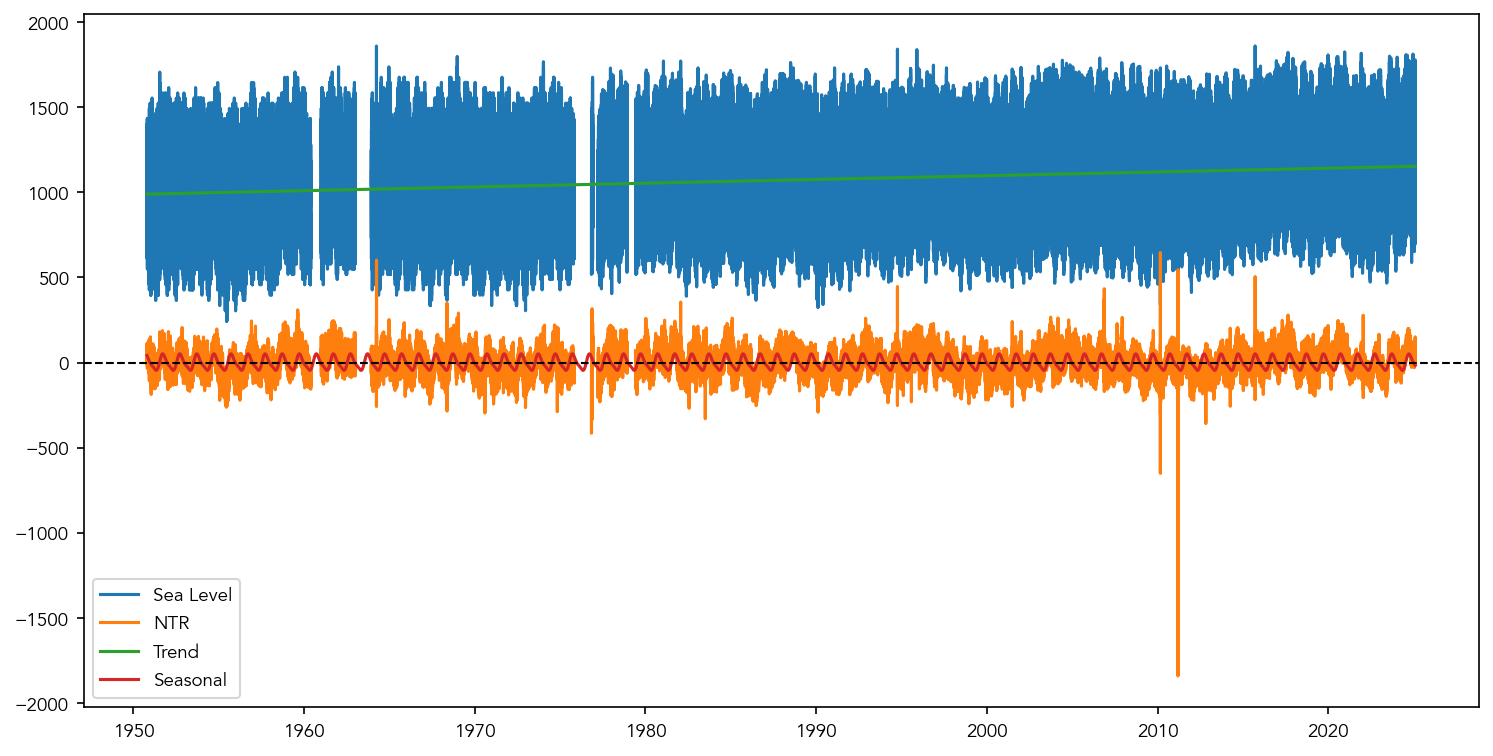

In [506]:
#plot sea level
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(ntr_data.time, ntr_data.sea_level, label='Sea Level')
ax.plot(ntr_data.time, ntr_data.ntr , label='NTR')
ax.plot(ntr_data.time, ntr_data.trend, label='Trend')
ax.plot(ntr_data.time, ntr_data.seasonal_cycle, label='Seasonal')

# add zero line
ax.axhline(0, color='k', linestyle='--', lw=1)

# add legend
ax.legend()

### Plot and Inspect
We're looking at the NTR with and without the nodal modulation removed.

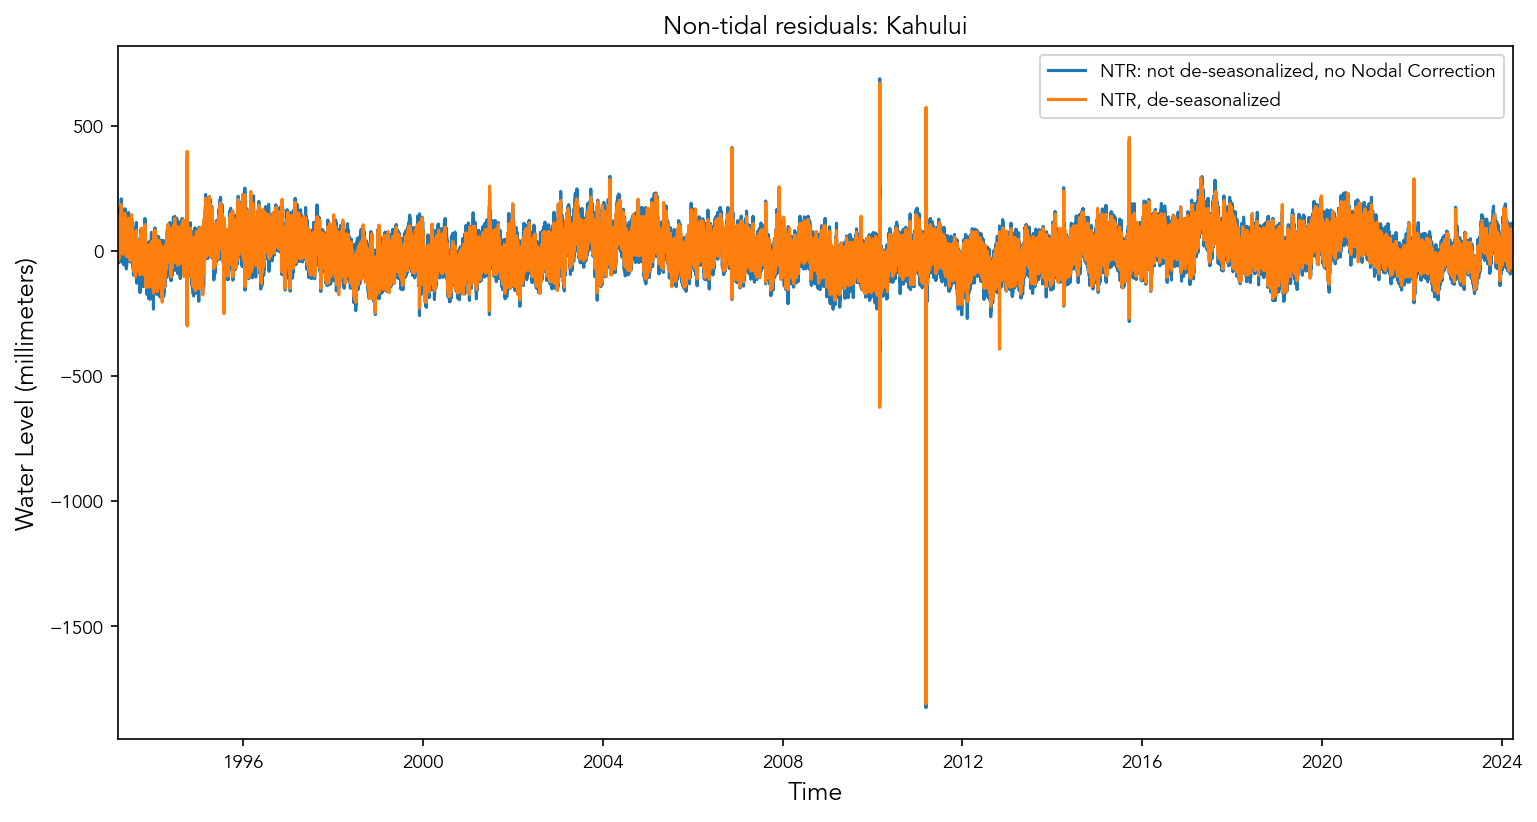

In [507]:
#plot time series
plt.figure(figsize=(12, 6))
plt.plot(ntr_data['time'], ntr_data['ntr_withNodal'], label='NTR: not de-seasonalized, no Nodal Correction')
plt.plot(ntr_data['time'], ntr_data['ntr']-ntr_data['seasonal_cycle'], label='NTR, de-seasonalized')
# plt.plot(ntr_data['time'], ntr_data['tide'], label='Predicted Tide')

# plt.plot(ntr_data['time'], ntr_data['ntr'] , label='Nodal modulated signal (NTR with nodal cycle - NTR without nodal cycle)')
# plt.plot(ntr_data['time'], ntr_data['nodal'], label='Nodal Cycle')
# plt.plot(ntr_data['time'], ntr_data['seasonal_cycle'], label='Seasonal Cycle')

# plt.plot(ntr_data['time'], ntr_data['ntr_withNodal']-ntr_data['nodal']+ntr_data['seasonal_cycle']-10 , label='NTR')

# add title
plt.title('Non-tidal residuals: ' + station_name)
plt.xlabel('Time')
plt.ylabel('Water Level' + ' (' + ds['sea_level'].attrs['units'] + ')')

#set x-axis to 2000-2005
plt.xlim([np.datetime64('1993-03-21'), np.datetime64('2024-03-30')])
plt.legend()


## First, let's look at the seasonal cycle
We obtain the seasonal cycle by using the SA and SSA coefficients from the tidal analysis. SA (Solar Annual) and SSA (Solar Semi-Annual) "mostly reflect yearly meteorological variations influencing sea level." [(NOAA Tides and Current Glossay)](https://tidesandcurrents.noaa.gov/glossary.html#S:~:text=per%20solar%20hour.-,Sa,-Solar%20annual%20constituent)

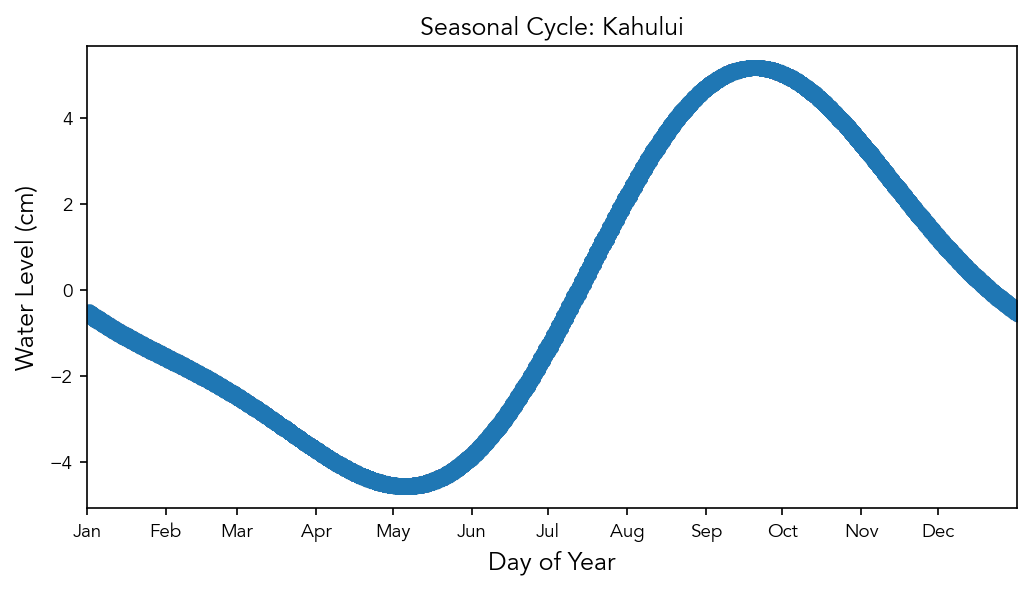

In [508]:
#convert timeseries to day of year
ntr_data['dayofyear'] = ntr_data['time'].dt.dayofyear
#plot time series with day of year
plt.figure(figsize=(8, 4))
plt.scatter(ntr_data['dayofyear'], 0.1* ntr_data['seasonal_cycle'], label='Seasonal Cycle', alpha=0.05)

#set labels
plt.title('Seasonal Cycle: ' + station_name)
plt.xlabel('Day of Year')
plt.ylabel('Water Level (cm)')
# set x-axis to 1-365
plt.xlim([0, 365])

# change x axis to months
plt.xticks([0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']);



Text(0.5, 0, 'Time')

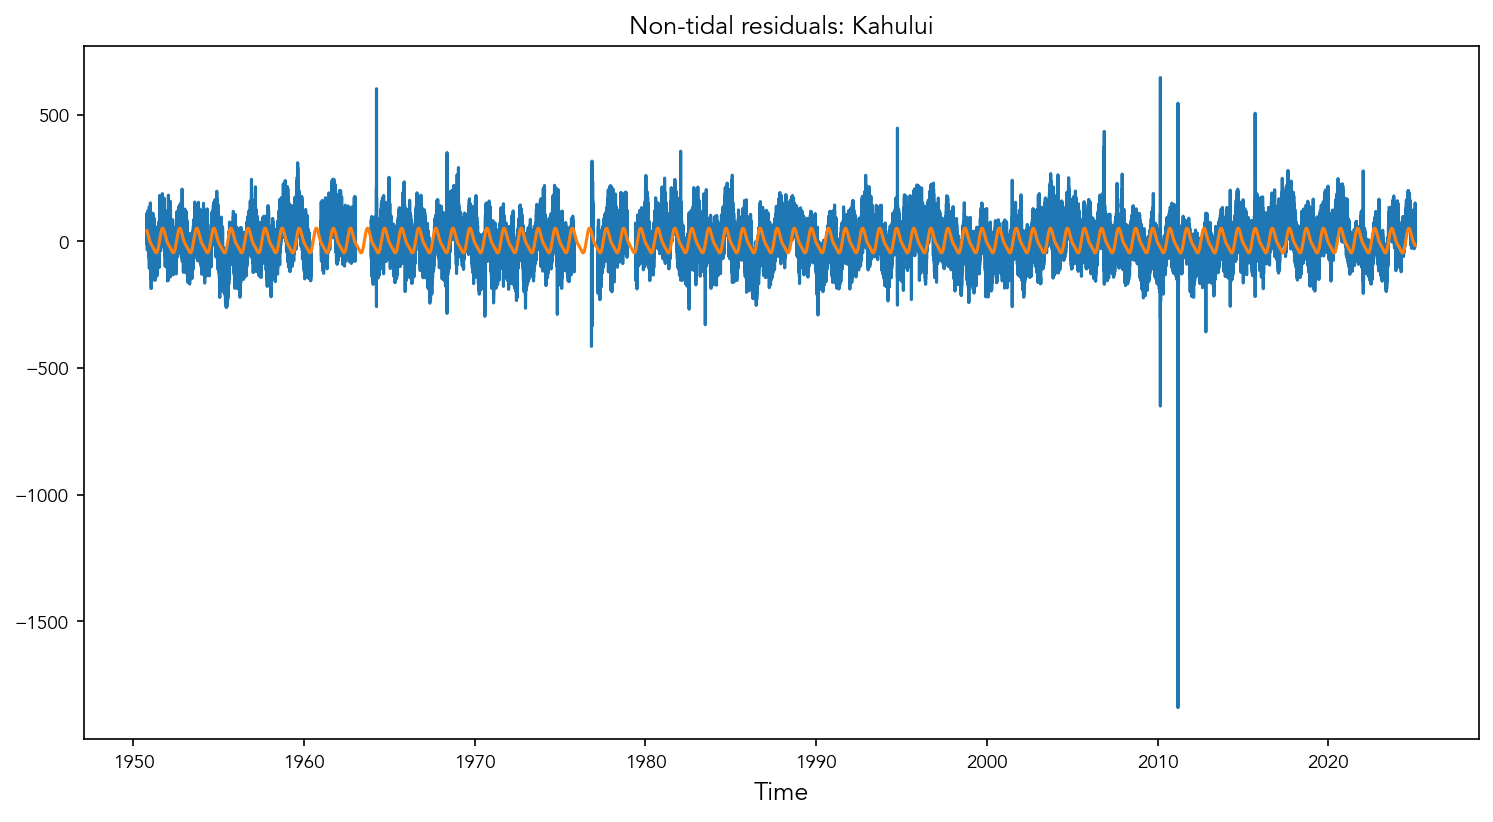

In [509]:
# Generate the full seasonal cycle in the original time domain
# Plot the original data and the fitted seasonal cycle
plt.figure(figsize=(12, 6))
plt.plot(ntr_data['time'], ntr_data['ntr'], label='NTR')
plt.plot(ntr_data['time'], ntr_data['seasonal_cycle'], label='Seasonal cycle')

plt.title('Non-tidal residuals: ' + station_name)
plt.xlabel('Time')

### Let's examine the Nodal modulation a bit more
As noted by others studying the Honolulu tide gauge (e.g. Thompson et al), the modulation of the nodal cycle on the 99th percentile water levels can affect high sea levels by up to 5cm. In low-lying areas this contribution can be significant. Here, we'll simulate this effect by taking the upper envelope of the yearly max of the nodal modulation. 

In [510]:
# # Let's try treating the nodal cycle  in terms of its envelope 
# Fit the upper envelope to a sinusoidal function with a period of 18.61 years
# The following code is adapted from Thompson et al. (2021), Projected 
# high-tide flooding in the United States: Rapid increases and extreme months, Nature Climate Change.

nodal = ntr_data['nodal'].copy()
nodal = nodal - nodal.mean()  # remove the mean
# set index to time
nodal.index = ntr_data['time']

nodal_upper_envelope = nodal.resample('YS').quantile(0.995).interpolate(method='linear')
nodal_lower_envelope = nodal.resample('YS').quantile(0.005).interpolate(method='linear')
t = nodal_upper_envelope.index.year + 0.5

def skewed_sine(t, A, phase, skew, offset):
    omega = 2 * np.pi / 18.61
    return offset + A * np.sin(omega * t + phase + skew * np.sin(omega * t + phase))

from scipy.optimize import curve_fit

def get_mod_envelope(nodal, t):

    # Initial guesses: A, phase, skew
    p0 = [np.std(nodal.values), 0, 0, np.mean(nodal.values)]  # amplitude ~ std of signal, phase = 0, no skew

    # Fit
    popt, _ = curve_fit(skewed_sine, t, nodal.values, p0=p0,bounds=([0, -2*np.pi, -2*np.pi, -np.inf], [np.inf, 2*np.pi, 2*np.pi, np.inf]))

    A_fit, phase_fit, skew_fit, offset_fit = popt

    ncyc_upper = skewed_sine(t, *popt)
    # ncyc_upper = skewed_sine(t, A_fit,phase_fit, 0, offset_fit)

    # make series
    ncyc_upper = pd.Series(ncyc_upper, index=pd.to_datetime((t - 1950) * 365.25, unit='D', origin='1950-01-01'))

    return ncyc_upper

# Fit the upper envelope
ncyc_upper = get_mod_envelope(nodal_upper_envelope, t)
# Fit the lower envelope
ncyc_lower = get_mod_envelope(nodal_lower_envelope, t)

ncyc_mod_upper = np.max(ncyc_upper) - np.min(ncyc_upper)
ncyc_mod_lower = np.max(ncyc_lower) - np.min(ncyc_lower)

print('Nodal cycle amplitude:', str(round(ncyc_mod_upper*0.1, 2)) , 'cm')


Nodal cycle amplitude: 3.14 cm


In [511]:
t

Index([1950.5, 1951.5, 1952.5, 1953.5, 1954.5, 1955.5, 1956.5, 1957.5, 1958.5,
       1959.5, 1960.5, 1961.5, 1962.5, 1963.5, 1964.5, 1965.5, 1966.5, 1967.5,
       1968.5, 1969.5, 1970.5, 1971.5, 1972.5, 1973.5, 1974.5, 1975.5, 1976.5,
       1977.5, 1978.5, 1979.5, 1980.5, 1981.5, 1982.5, 1983.5, 1984.5, 1985.5,
       1986.5, 1987.5, 1988.5, 1989.5, 1990.5, 1991.5, 1992.5, 1993.5, 1994.5,
       1995.5, 1996.5, 1997.5, 1998.5, 1999.5, 2000.5, 2001.5, 2002.5, 2003.5,
       2004.5, 2005.5, 2006.5, 2007.5, 2008.5, 2009.5, 2010.5, 2011.5, 2012.5,
       2013.5, 2014.5, 2015.5, 2016.5, 2017.5, 2018.5, 2019.5, 2020.5, 2021.5,
       2022.5, 2023.5, 2024.5, 2025.5],
      dtype='float64', name='time')

(8401.0, 20148.0)

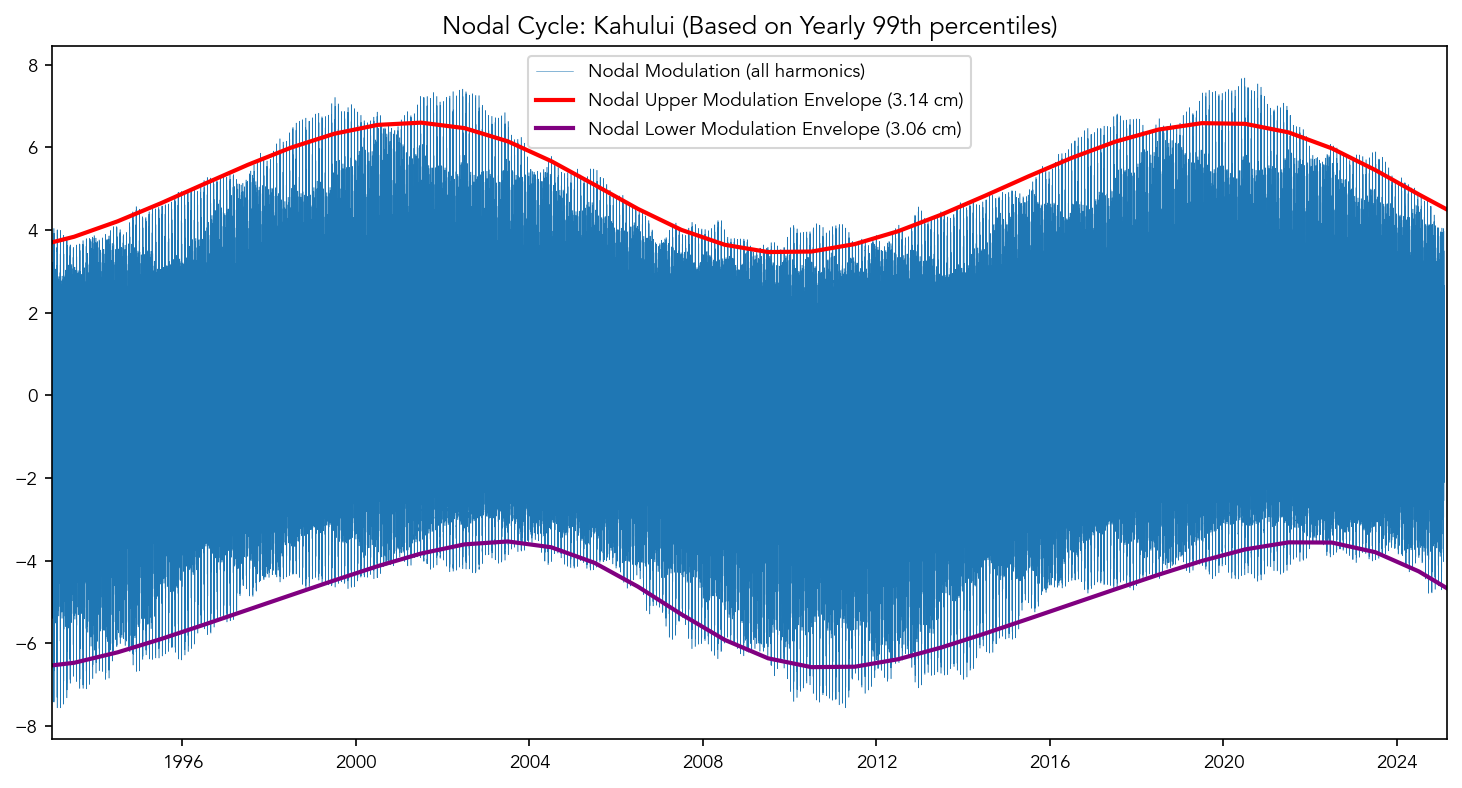

In [512]:
#plot the nodal signal and the envelope
plt.figure(figsize=(12, 6))
plt.plot(ntr_data['time'], 0.1*ntr_data['nodal'], label='Nodal Modulation (all harmonics)',linewidth=0.25)
plt.plot(ncyc_upper.index, 0.1*ncyc_upper, label='Nodal Upper Modulation Envelope (' + str(round(ncyc_mod_upper*0.1, 2)) + ' cm)', color='red', linewidth=2)
# plt.scatter(ncyc_upper.index, 0.1*nodal_upper_envelope, label='Yearly 99th percentile', color='orange', linestyle='-', linewidth=2)
plt.plot(ncyc_lower.index, 0.1*ncyc_lower, label='Nodal Lower Modulation Envelope (' + str(round(ncyc_mod_lower*0.1, 2)) + ' cm)', color='purple', linewidth=2)
# plt.scatter(ncyc_lower.index, 0.1*nodal_lower_envelope, label='Yearly 1st percentile', color='cyan', linestyle='-', linewidth=2)

plt.title('Nodal Cycle: ' + station_name + ' (Based on Yearly 99th percentiles)')

plt.legend()
#set x-axis to 2017-2018
plt.xlim([np.datetime64('1993-01-01'), np.datetime64('2025-03-01')])

In [513]:
ntr_data

,time,ntr,sea_level,sea_level_detrended,trend,tide,nodal,ntr_withNodal,seasonal_cycle,dayofyear
0,1950-10-19 02:00:00,80.018864,1006.0,16.478615,989.521385,-63.540250,19.973256,56.712063,42.070393,292
1,1950-10-19 03:00:00,66.567675,945.0,-44.521636,989.521636,-111.089312,6.907013,30.219387,42.045638,292
2,1950-10-19 04:00:00,59.303242,914.0,-75.521887,989.521887,-134.825129,-5.653964,10.418755,42.020859,292
3,1950-10-19 05:00:00,62.475845,914.0,-75.522138,989.522138,-137.997983,-16.019093,3.251030,41.996058,292
4,1950-10-19 06:00:00,51.568852,914.0,-75.522389,989.522389,-127.091240,-23.102491,-14.714538,41.971234,292
...,...,...,...,...,...,...,...,...,...,...
651209,2025-01-31 19:00:00,149.596275,1203.0,50.092970,1152.907030,-99.503306,18.978705,182.949894,-15.584577,31
651210,2025-01-31 20:00:00,144.742653,1116.0,-36.907281,1152.907281,-181.649934,12.712314,171.842478,-15.597175,31
651211,2025-01-31 21:00:00,134.847742,1093.0,-59.907532,1152.907532,-194.755274,5.054915,154.302767,-15.609773,31
651212,2025-01-31 22:00:00,109.796030,1119.0,-33.907783,1152.907783,-143.703813,-2.613613,121.595126,-15.622373,31


In [514]:
# ntr_data['time'] = pd.to_datetime(ntr_data['time'])
# ntr_data = ntr_data.set_index('time')
# Reset the index to make 'time' a column, then create a subset dataframe
sea_level_data = ntr_data.reset_index()[['ntr', 'time']].copy()
# sea_level_data['time'] = ntr_data['time']
ntr_data_mags,ntr_trend_series,ntr_trend_rates = process_trend_with_nan(sea_level_data)
# sea_level_data
ntr_data['ntr_detrended'] = ntr_data['ntr'] - ntr_trend_series['ntr'] - ntr_data['seasonal_cycle']

In [515]:
ntr_data_mags


{'ntr': -0.0886637459718822}

Text(0, 0.5, 'Non-tidal residuals (millimeters)')

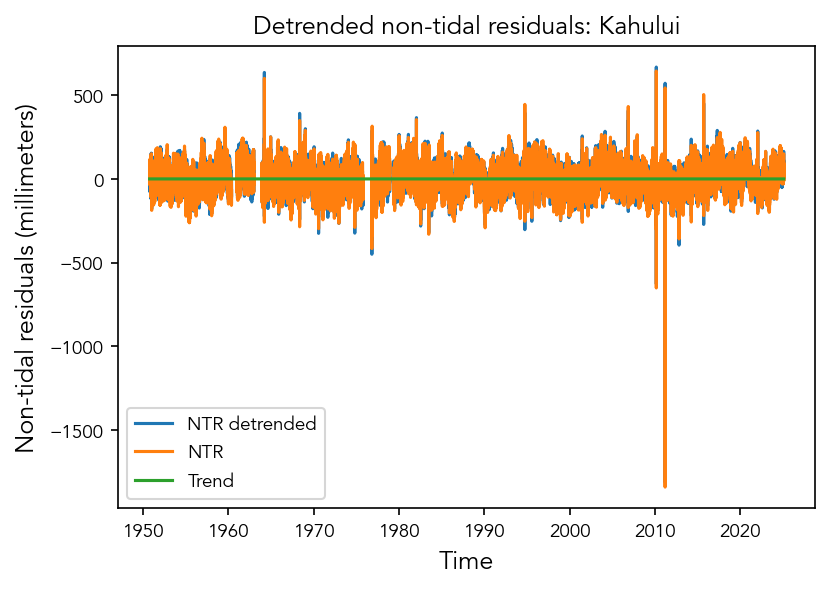

In [516]:
import matplotlib.pyplot as plt

# Ensure 'time' is a column in ntr_data
if 'time' not in ntr_data.columns:
	ntr_data = ntr_data.reset_index()

plt.plot(ntr_data['time'], ntr_data['ntr_detrended'], label='NTR detrended')
plt.plot(ntr_data['time'], ntr_data['ntr'], label='NTR')
plt.plot(ntr_data['time'], ntr_trend_series['ntr'], label='Trend')
plt.legend()

# Add title
plt.title('Detrended non-tidal residuals: ' + station_name)
plt.xlabel('Time')
plt.ylabel('Non-tidal residuals' + ' (' + ds['sea_level'].attrs['units'] + ')')

# Uncomment and adjust x-axis and y-axis limits as needed
# plt.xlim([np.datetime64('2017-10-01'), np.datetime64('2017-10-02')])
# plt.ylim([0, 200])

In [517]:
# Now start to filter for each frequency band we want

# make time_diffs in hours
time_diffs = np.diff(ntr_data['time']).astype('timedelta64[h]').astype(int)
widthSeasonal = 1/365.25/10; #1 cycle per decade



```{caution}
The timescales probably need some refinement. For example: mesoscale processes. Higher the latitude the longer the period!!
```
From Chen, S., and B. Qiu (2010), Mesoscale eddies northeast of the Hawaiian archipelago from satellite altimeter observations, J. Geophys. Res., 115, C03016, doi:10.1029/2009JC005698


"We define dominant periods of the mesoscale eddy activity by locating the periods at which the spectral peaks within the mesoscale range of 90–180 days. This definition is crude yet robust for the subregions with sharp spectral peaks like the 24°N–27°N, 160°W–155°W one (130 days) and the 18°N–21°N, 170°W–165°W one (90 days), but is also applicable to other subregions. In the lee of the island of Hawaii, 90 day oscillations dominate the mesoscale eddy activity. In the subregions between 24°N and 30°N, a 130 day peak often prevails, but in the 30°N–33°N band, a weak 180 day peak emerges. The pattern is that the higher the latitude, the longer the dominant period."

Also:
Firing, Y. L., and M. A. Merrifield (2004), Extreme sea level events at Hawaii: Influence of mesoscale eddies, Geophys. Res. Lett., 31, L24306, doi:10.1029/2004GL021539.

In [518]:
ntr_data

,time,ntr,sea_level,sea_level_detrended,trend,tide,nodal,ntr_withNodal,seasonal_cycle,dayofyear,ntr_detrended
0,1950-10-19 02:00:00,80.018864,1006.0,16.478615,989.521385,-63.540250,19.973256,56.712063,42.070393,292,36.683840
1,1950-10-19 03:00:00,66.567675,945.0,-44.521636,989.521636,-111.089312,6.907013,30.219387,42.045638,292,23.257407
2,1950-10-19 04:00:00,59.303242,914.0,-75.521887,989.521887,-134.825129,-5.653964,10.418755,42.020859,292,16.017751
3,1950-10-19 05:00:00,62.475845,914.0,-75.522138,989.522138,-137.997983,-16.019093,3.251030,41.996058,292,19.215156
4,1950-10-19 06:00:00,51.568852,914.0,-75.522389,989.522389,-127.091240,-23.102491,-14.714538,41.971234,292,8.332987
...,...,...,...,...,...,...,...,...,...,...,...
651209,2025-01-31 19:00:00,149.596275,1203.0,50.092970,1152.907030,-99.503306,18.978705,182.949894,-15.584577,31,164.004884
651210,2025-01-31 20:00:00,144.742653,1116.0,-36.907281,1152.907281,-181.649934,12.712314,171.842478,-15.597175,31,159.163860
651211,2025-01-31 21:00:00,134.847742,1093.0,-59.907532,1152.907532,-194.755274,5.054915,154.302767,-15.609773,31,149.281547
651212,2025-01-31 22:00:00,109.796030,1119.0,-33.907783,1152.907783,-143.703813,-2.613613,121.595126,-15.622373,31,124.242435


In [519]:
# Define timescales (in days)
biannual = 365.25*2
semiannual = 365.25/2
qtrannual = 365.25/4
weekly = 7
bimonthly = 2*365.25/12
decadal = 9*365.25
# interdecadal = 30*365.25


# make a dictionary of the timescales and the processes
timeframes = {'Decadal': 'e.g. PDO, 9-30+ yr', 
              'Seasonal': 'Annual, Semi-Annual',
              'Interannual': 'e.g. ENSO, 2-9 yr', 
              'Intraannual': 'e.g. Mesoscale eddies', 
              'Weekly': '1 week - 2 months', 
              'Storms & HF': '& other short-term variability',
              'Nodal Amp': '18.6 yr tidal modulation'}

# get frequency of annual cycle
# annual_freq = 1/annual

# # if record length is less than 35 years, leave out interdecadal
# rec_length = (ntr_data['time'].max() - ntr_data['time'].min()).days
# if rec_length < 35*365.25:
#     timeframes.pop('Interdecadal')
#     #rename Decadal value
#     timeframes['Decadal'] = 'e.g. PDO, 9-30+ yr'

# interpolate ncyc to the same time as ntr_data
ncyc_interp = ncyc_upper.reindex(ntr_data['time']).interpolate(method='linear')

# demean ncyc_interp
# ncyc_interp = ncyc_interp - ncyc_interp.mean()

In [520]:
# detrend ntr_data
ntr_data['ntr_detrended'] = ntr_data['ntr'] - ntr_trend_series['ntr']

In [521]:

def filter_ntr(ntr_data):
    # ntr_noAnnual, ntr_Annual = filter_known_frequency_components(ntr_data['ntr_detrended'], time_diffs,1/annual , width=widthSeasonal)
    # ntr_noSemiAnnual, ntr_SemiAnnual = filter_known_frequency_components(ntr_noAnnual, time_diffs, 1/semiannual, width=widthSeasonal)
    # ntr_noQtrAnnual, ntr_QtrAnnual = filter_known_frequency_components(ntr_noSemiAnnual, time_diffs, 1/qtrannual, width=widthSeasonal)
    # ntr_Seasonal = ntr_Annual + ntr_SemiAnnual + ntr_QtrAnnual

    rec_length = (ntr_data['time'].max() - ntr_data['time'].min()).days
    
    # if rec_length < 35*365.25:
        #interdecadal
        # ntr_interdecadal, ntr_highFreq = butterworth_lowpass(ntr_data['ntr_detrended'], time_diffs, 1/interdecadal, order=3, padtype='even', padlen=3)
        #decadal
    ntr_decadal, ntr_highFreq = butterworth_lowpass(ntr_data['ntr_detrended']-ntr_data['seasonal_cycle'] , time_diffs, 1/decadal, order=3) 
    #     ntr_decadal = ntr_decadal + ntr_interdecadal
    # else:
    #     #interdecadal
    #     ntr_interdecadal, ntr_highFreq = butterworth_lowpass(ntr_data['ntr_detrended'], time_diffs, 1/interdecadal, order=3, padtype='even', padlen=3)
    #     #decadal
    #     ntr_decadal, ntr_highFreq = butterworth_lowpass(ntr_highFreq, time_diffs, 1/decadal, order=3)

    #interannual
    ntr_interannual, ntr_highFreq = butterworth_lowpass(ntr_highFreq, time_diffs, 1/biannual, order=4)

    # intraannual
    # this should be done in wavelets instead of a lowpass filter??

    ntr_intraannual, ntr_highFreq = butterworth_lowpass(ntr_highFreq, time_diffs, 1/bimonthly, order=5)

    # Remove high frequencies (weekly to hourly)
    # ntr_weekly is timescales longer than 7 days but less than 1 month
    ntr_weekly, ntr_highFreq = butterworth_lowpass(ntr_highFreq, time_diffs, 1/weekly, order=5)

    

    # make dataframe of filtered data
    ntr_filtered = pd.DataFrame({'time': ntr_data['time'], 
                             'ntr': ntr_data['ntr_detrended']- ntr_data['seasonal_cycle'], 
                             'sea_level': ntr_data['sea_level'],
                             'sea_level_detrended': ntr_data['sea_level_detrended'],
                             'tide': ntr_data['tide'],
                             'Nodal Amp': ncyc_interp.values,
                             'Nodal Mod': ntr_data['nodal'],
                             'Trend': ntr_data['trend'],
                            #  'Interdecadal': ntr_interdecadal, 
                             'Decadal': ntr_decadal, 
                             'Interannual': ntr_interannual, 
                             'Seasonal': ntr_data['seasonal_cycle'], 
                             'Intraannual': ntr_intraannual, 
                             'Weekly': ntr_weekly, 
                             'Storms & HF': ntr_highFreq,
                             'NTR Trend': ntr_trend_series['ntr']})

    # if rec_length < 35*365.25:
    #     ntr_filtered.pop('Interdecadal')

    component_names = list(ntr_filtered.columns) 
    component_names.remove('time')
    component_names.remove('ntr')
    component_names.remove('sea_level')
    component_names.remove('sea_level_detrended')
    component_names.remove('Nodal Amp')
    component_names.remove('Nodal Mod')

    # add trend back into ntr
    # ntr_filtered['ntr'] = ntr_filtered['ntr'] - ntr_filtered['Trend']
    
    return ntr_filtered, component_names


In [522]:
ntr_filtered,component_names = filter_ntr(ntr_data)

# get std of each component
ntr_component_stds = ntr_filtered.std()

# remove time from ntr)component_stds
ntr_component_stds = ntr_component_stds.drop('time')

Filled 5 % of data with noise (std = 60.1923).


In [523]:
ntr_data

,time,ntr,sea_level,sea_level_detrended,trend,tide,nodal,ntr_withNodal,seasonal_cycle,dayofyear,ntr_detrended
0,1950-10-19 02:00:00,80.018864,1006.0,16.478615,989.521385,-63.540250,19.973256,56.712063,42.070393,292,78.754233
1,1950-10-19 03:00:00,66.567675,945.0,-44.521636,989.521636,-111.089312,6.907013,30.219387,42.045638,292,65.303044
2,1950-10-19 04:00:00,59.303242,914.0,-75.521887,989.521887,-134.825129,-5.653964,10.418755,42.020859,292,58.038611
3,1950-10-19 05:00:00,62.475845,914.0,-75.522138,989.522138,-137.997983,-16.019093,3.251030,41.996058,292,61.211214
4,1950-10-19 06:00:00,51.568852,914.0,-75.522389,989.522389,-127.091240,-23.102491,-14.714538,41.971234,292,50.304221
...,...,...,...,...,...,...,...,...,...,...,...
651209,2025-01-31 19:00:00,149.596275,1203.0,50.092970,1152.907030,-99.503306,18.978705,182.949894,-15.584577,31,148.420307
651210,2025-01-31 20:00:00,144.742653,1116.0,-36.907281,1152.907281,-181.649934,12.712314,171.842478,-15.597175,31,143.566685
651211,2025-01-31 21:00:00,134.847742,1093.0,-59.907532,1152.907532,-194.755274,5.054915,154.302767,-15.609773,31,133.671774
651212,2025-01-31 22:00:00,109.796030,1119.0,-33.907783,1152.907783,-143.703813,-2.613613,121.595126,-15.622373,31,108.620062


In [524]:
component_names

['tide',
 'Trend',
 'Decadal',
 'Interannual',
 'Seasonal',
 'Intraannual',
 'Weekly',
 'Storms & HF',
 'NTR Trend']

In [525]:
# save ntr_component_stds to csv
savepath = Path(data_dir, f'ntr_data/ntr_{station:03d}_component_stds.csv')
ntr_component_stds.to_csv(savepath)


In [526]:
# look at filtered components of nodal cycle only
# nodal_data = ntr_data.copy()
# nodal_data.index = ntr_data['time']
# envelope_demeaned = envelope - np.nanmean(envelope)
# envelope_demeaned.index = nodal_data.index
# nodal_data['ntr_detrended'] = envelope_demeaned
# nodal_filtered = filter_ntr(nodal_data)

# #rename "ntr" in nodal_filtered to "nodal upper envelope"
# nodal_filtered = nodal_filtered.rename(columns={'ntr': 'nodal envelope'})

# nodal_component_std = nodal_filtered.std() 
# nodal_component_std = nodal_component_std.drop('time')



In [527]:
ntr_filtered

,time,ntr,sea_level,sea_level_detrended,tide,Nodal Amp,Nodal Mod,Trend,Decadal,Interannual,Seasonal,Intraannual,Weekly,Storms & HF,NTR Trend
0,1950-10-19 02:00:00,36.683840,1006.0,16.478615,-63.540250,NaN,19.973256,989.521385,55.307262,-18.636357,42.070393,-14.188237,11.482249,2.718924,1.264631
1,1950-10-19 03:00:00,23.257407,945.0,-44.521636,-111.089312,NaN,6.907013,989.521636,55.304338,-18.641994,42.045638,-14.229327,11.182967,-10.358577,1.264631
2,1950-10-19 04:00:00,16.017751,914.0,-75.521887,-134.825129,NaN,-5.653964,989.521887,55.301414,-18.647631,42.020859,-14.270429,10.875291,-17.240894,1.264631
3,1950-10-19 05:00:00,19.215156,914.0,-75.522138,-137.997983,NaN,-16.019093,989.522138,55.298489,-18.653266,41.996058,-14.311544,10.559231,-13.677754,1.264631
4,1950-10-19 06:00:00,8.332987,914.0,-75.522389,-127.091240,NaN,-23.102491,989.522389,55.295565,-18.658901,41.971234,-14.352671,10.234805,-24.185811,1.264631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651209,2025-01-31 19:00:00,164.004884,1203.0,50.092970,-99.503306,48.613346,18.978705,1152.907030,-1.365760,38.617180,-15.584577,20.780893,-10.972410,116.944981,1.175968
651210,2025-01-31 20:00:00,159.163860,1116.0,-36.907281,-181.649934,48.613346,12.712314,1152.907281,-1.365760,38.617180,-15.597175,20.780893,-10.971920,112.103467,1.175968
651211,2025-01-31 21:00:00,149.281547,1093.0,-59.907532,-194.755274,48.613346,5.054915,1152.907532,-1.365760,38.617180,-15.609773,20.780893,-10.971520,102.220754,1.175968
651212,2025-01-31 22:00:00,124.242435,1119.0,-33.907783,-143.703813,48.613346,-2.613613,1152.907783,-1.365760,38.617180,-15.622373,20.780893,-10.971196,77.181317,1.175968


Note that to define the upper envelope we used monthly maxima. So there should be NO correlation in the weekly/storms.

Next, a sanity check to make sure that everything adds up to the right sum.

In [528]:
component_names

['tide',
 'Trend',
 'Decadal',
 'Interannual',
 'Seasonal',
 'Intraannual',
 'Weekly',
 'Storms & HF',
 'NTR Trend']

In [529]:
component_names
#remove Trend from component names
# component_names.remove('sea_level_detrended')
component_names.remove('Trend')
# component_names.remove('Seasonal')

Text(0.5, 1.0, 'Sum of components vs Sea Level')

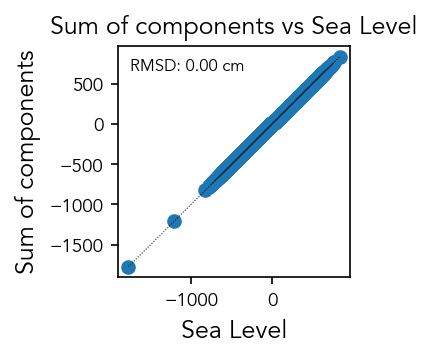

In [530]:
#plot ntr, then plot summed components
plt.figure(figsize=(2, 2))

# sum all components in components_names programmatically
ntr_sum = ntr_filtered[component_names].sum(axis=1)


#make a dotted 1:1 line
plt.plot(ntr_filtered['sea_level_detrended'], ntr_filtered['sea_level_detrended'], 'k:', label='1:1 line',linewidth=0.5,alpha=0.5)
plt.scatter(ntr_filtered['sea_level_detrended'], ntr_sum)

plt.xlabel('Sea Level')
plt.ylabel('Sum of components')

# add RMSD to plot
rmsd = np.sqrt(np.mean((ntr_filtered['sea_level_detrended'] - ntr_sum)**2))
plt.text(0.05, 0.95, f'RMSD: {rmsd:.2f} cm', ha='left', va='top', transform=plt.gca().transAxes, fontsize=8)
plt.title('Sum of components vs Sea Level')


In [531]:
#export data
# ntr_filtered.to_csv('data/ntr_filtered_059b.csv', index=False)
ntr_filtered.keys()

Index(['time', 'ntr', 'sea_level', 'sea_level_detrended', 'tide', 'Nodal Amp',
       'Nodal Mod', 'Trend', 'Decadal', 'Interannual', 'Seasonal',
       'Intraannual', 'Weekly', 'Storms & HF', 'NTR Trend'],
      dtype='object')

Text(0.5, 1.0, 'Correlation between each component')

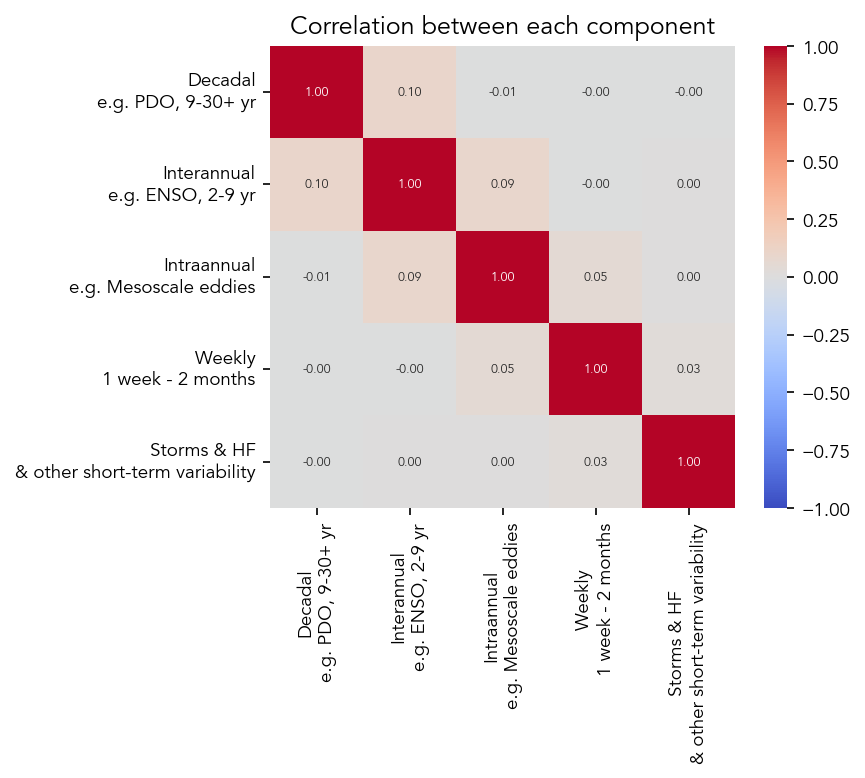

In [532]:
import seaborn as sns
import matplotlib.pyplot as plt

#make a heatmap plot of correlation between each component
ntr_corr = ntr_filtered.drop(['time','sea_level','sea_level_detrended','tide','ntr','Nodal Amp','Nodal Mod','Trend','NTR Trend','Seasonal'], axis=1).corr()

# add description to each component in ntr correlation matrix
ntr_corr.columns = [col + '\n' + timeframes[col] for col in ntr_corr.columns]
ntr_corr.index = [col + '\n' + timeframes[col] for col in ntr_corr.index]
#exclude time,sea_level, and tide from the correlation matrix

#plot heatmap
plt.figure(figsize=(5,4))
sns.heatmap(ntr_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", annot_kws={"size": 6})
plt.title('Correlation between each component')



Note there is correlation between some of these timeseries, likely due to the filtering process employed in this notebook. 

In [533]:
# get the cumulative sum of the components
ntr_component_names = component_names.copy()
ntr_component_names.remove('tide')
# move trend and Seasonal to the beginning of the list
# ntr_component_names.remove('Seasonal')
# ntr_component_names.insert(0, 'Seasonal')
ntr_component_names.remove('NTR Trend')
ntr_component_names.insert(0, 'NTR Trend')
ntr_cumsum = ntr_filtered[ntr_component_names].cumsum(axis=1)
ntr_cumsum_stds = ntr_cumsum.std()
ntr_cumsum_stds


# make a plot of ntr_filtered and ntr_cumsum
# fig, ax = plt.subplots(figsize=(12, 6))
# ntr_filtered.plot(x='time', y=['ntr'], ax=ax, color=['black'], linewidth=1)
# ntr_filtered_sums.plot(x='time', y=['Nodal'] +['> 20 years'], ax=ax, color='yellow',linewidth=1, linestyle='--')
# ntr_cumsum.plot(x='time', y=['Nodal', '> 20 years'], ax=ax, linewidth=1, linestyle='--')
# ntr_cumsum.plot(x='time', y=['Nodal', '> 20 years', '10-20 year', '1-10 year', 'Seasonal', '1 month - 1 year', '1 week - 1 month', '< 1 week'], ax=ax, linewidth=1, linestyle='--')


NTR Trend       0.025595
Decadal        19.687601
Interannual    34.888028
Seasonal       47.541223
Intraannual    57.076450
Weekly         61.242163
Storms & HF    68.284229
dtype: float64

In [534]:
ntr_filtered.keys()

Index(['time', 'ntr', 'sea_level', 'sea_level_detrended', 'tide', 'Nodal Amp',
       'Nodal Mod', 'Trend', 'Decadal', 'Interannual', 'Seasonal',
       'Intraannual', 'Weekly', 'Storms & HF', 'NTR Trend'],
      dtype='object')

In [535]:
ntr_filtered

,time,ntr,sea_level,sea_level_detrended,tide,Nodal Amp,Nodal Mod,Trend,Decadal,Interannual,Seasonal,Intraannual,Weekly,Storms & HF,NTR Trend
0,1950-10-19 02:00:00,36.683840,1006.0,16.478615,-63.540250,NaN,19.973256,989.521385,55.307262,-18.636357,42.070393,-14.188237,11.482249,2.718924,1.264631
1,1950-10-19 03:00:00,23.257407,945.0,-44.521636,-111.089312,NaN,6.907013,989.521636,55.304338,-18.641994,42.045638,-14.229327,11.182967,-10.358577,1.264631
2,1950-10-19 04:00:00,16.017751,914.0,-75.521887,-134.825129,NaN,-5.653964,989.521887,55.301414,-18.647631,42.020859,-14.270429,10.875291,-17.240894,1.264631
3,1950-10-19 05:00:00,19.215156,914.0,-75.522138,-137.997983,NaN,-16.019093,989.522138,55.298489,-18.653266,41.996058,-14.311544,10.559231,-13.677754,1.264631
4,1950-10-19 06:00:00,8.332987,914.0,-75.522389,-127.091240,NaN,-23.102491,989.522389,55.295565,-18.658901,41.971234,-14.352671,10.234805,-24.185811,1.264631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651209,2025-01-31 19:00:00,164.004884,1203.0,50.092970,-99.503306,48.613346,18.978705,1152.907030,-1.365760,38.617180,-15.584577,20.780893,-10.972410,116.944981,1.175968
651210,2025-01-31 20:00:00,159.163860,1116.0,-36.907281,-181.649934,48.613346,12.712314,1152.907281,-1.365760,38.617180,-15.597175,20.780893,-10.971920,112.103467,1.175968
651211,2025-01-31 21:00:00,149.281547,1093.0,-59.907532,-194.755274,48.613346,5.054915,1152.907532,-1.365760,38.617180,-15.609773,20.780893,-10.971520,102.220754,1.175968
651212,2025-01-31 22:00:00,124.242435,1119.0,-33.907783,-143.703813,48.613346,-2.613613,1152.907783,-1.365760,38.617180,-15.622373,20.780893,-10.971196,77.181317,1.175968


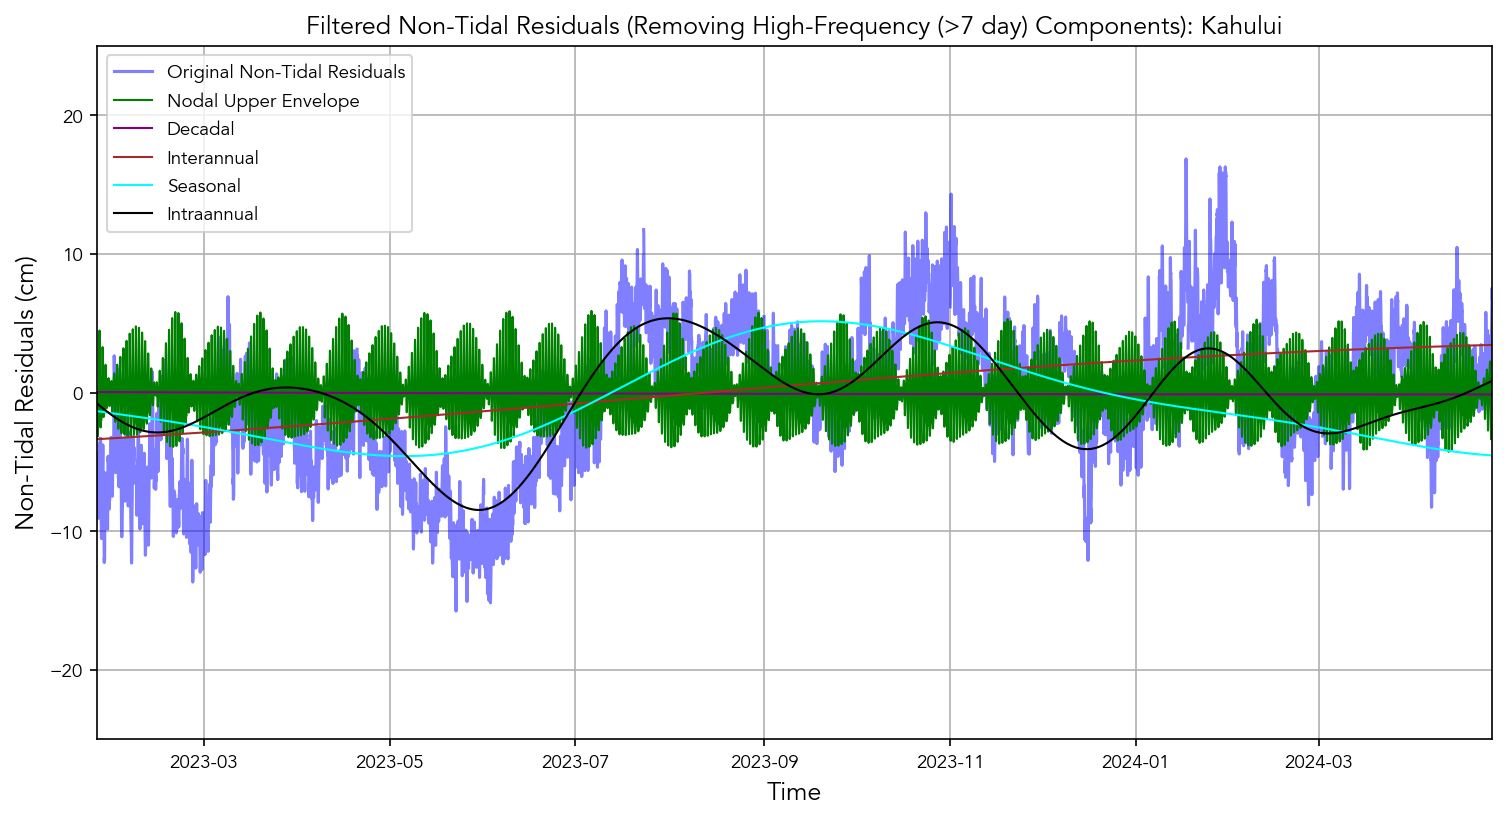

In [536]:
# Plot original vs. filtered signal
plt.figure(figsize=(12, 6))
plt.plot(ntr_filtered['time'], 0.1*(ntr_filtered['ntr']-ntr_filtered['NTR Trend']), label='Original Non-Tidal Residuals', color ="blue",alpha=0.5)
# plt.plot(ntr_filtered['time'], ntr_filtered['> 20 years'], label='$NTR - NTR_{hf}$', color='orange', linewidth=2)

# ntr_summed = ntr_Annual + ntr_SemiAnnual + ntr_QtrAnnual + ntr_subAnnual + ntr_multiyear + ntr_decadal + ntr_lowFreq + ntr_monthly
# ntr_summed = ntr_filtered['Nodal']+ ntr_filtered['> 20 years'] + ntr_filtered['10-20 year'] + ntr_filtered['1-10 year'] + ntr_filtered['Seasonal'] + ntr_filtered['1 month - 1 year'] + ntr_filtered['1 week - 1 month'] + ntr_filtered['< 1 week']

# plt.plot(ntr_filtered['time'], ntr_summed, label='Sum of Filtered Components', color='red', linewidth=1)

plt.plot(ntr_filtered['time'], 0.1*ntr_filtered['Nodal Mod'], label='Nodal Upper Envelope', color='green', linewidth=1)
# plt.plot(ntr_filtered['time'], ntr_filtered['> 20 years'], label='> 20 years', color='orange', linewidth=1)
plt.plot(ntr_filtered['time'], 0.1*ntr_filtered['Decadal'], label='Decadal', color='purple', linewidth=1)
plt.plot(ntr_filtered['time'], 0.1*ntr_filtered['Interannual'], label='Interannual', color='brown', linewidth=1)
plt.plot(ntr_filtered['time'], 0.1*ntr_filtered['Seasonal'], label='Seasonal', color='cyan', linewidth=1)
plt.plot(ntr_filtered['time'], 0.1*ntr_filtered['Intraannual'], label='Intraannual', color='black', linewidth=1)
# plt.plot(ntr_filtered['time'], ntr_filtered['1 week - 2 month'], label='1 week - 2 month', color='pink', linewidth=1)
# plt.plot(ntr_filtered['time'], ntr_filtered['< 1 week'], label='< 1 week', color='grey', linewidth=1)
# plt.plot(ntr_data['time'], ntr_data['ntr'], label='NTR with Nodal Cycle')



plt.xlabel('Time')
plt.ylabel('Non-Tidal Residuals (cm)')
plt.title('Filtered Non-Tidal Residuals (Removing High-Frequency (>7 day) Components): ' + station_name)
plt.legend()
plt.grid()

# change xlim to zoom in
plt.xlim(pd.Timestamp('2023-01-25'), pd.Timestamp('2024-04-27'))
plt.ylim(-25,25)
plt.show()

In [537]:
ntr_filtered
#resample to monthly
ntr_filtered_monthly = ntr_filtered.resample('ME', on='time').mean()

Text(0.5, 1.0, 'Interannual NTR and ONI')

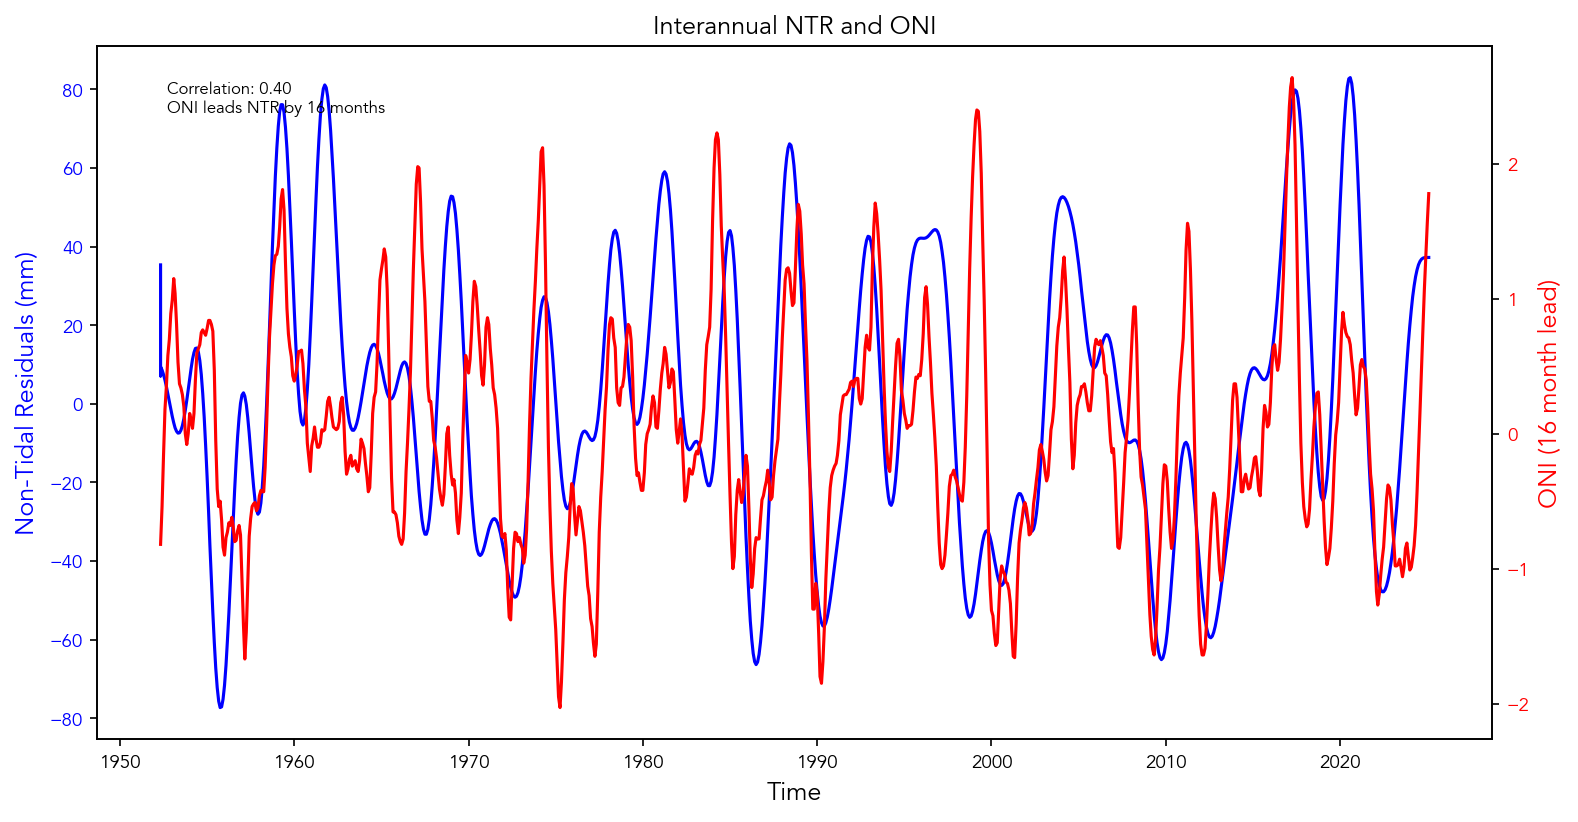

In [538]:
# Is the interannual component correlated with ENSO? Let's use the ONI index
# load ONI data

CI_dir = Path(data_dir / 'climate_indices')
climateIndex = ['AO','BEST','ONI','PDO','PMM','PNA','TNA']

CIcorr = np.zeros((len(climateIndex), 30))

# Arrays to store peak correlation and lag for each climate index
CIcorr_max_peaks = np.zeros(len(climateIndex))
CIcorr_max_lag = np.zeros(len(climateIndex))

for indCI in range(len(climateIndex)):
    CI = pd.read_csv(CI_dir / (climateIndex[indCI] + '.csv'), parse_dates=['time'])
    # ntr_CI = pd.merge_asof(ntr_filtered_monthly.sort_index(), CI.sort_index(), left_index=True, right_index=True, direction='nearest')
    CI['time'] = pd.to_datetime(CI['time'])

    # Perform the merge
    ntr_CI = pd.merge_asof(ntr_filtered_monthly, CI, left_index=True, right_on='time', direction='nearest')
    # Define the number of lags
    lag = 30
    corr = np.zeros(lag)

    if climateIndex[indCI] == 'PDO' or climateIndex[indCI] == 'PMM': #<--- IS THIS CORRECT?
        # For PDO and PMM, we need to add the decadal component to the interannual component
        ntr_CI['signal'] = ntr_CI['Interannual'] + ntr_CI['Decadal']
    else:
        # For other climate indices, we just use the interannual component
        ntr_CI['signal'] = ntr_CI['Interannual']


    # Calculate lagged correlation
    for i in range(1, lag + 1):
        corr[i - 1] = np.corrcoef(ntr_CI[climateIndex[indCI]][:-i], ntr_CI['signal'][i:])[0, 1]
    CIcorr[indCI,:] = corr
    # get max correlation and lag
    CIcorr_max_peaks[indCI] = np.max(abs(CIcorr[indCI,:]))
    CIcorr_max_lag[indCI] = np.argmax(abs(CIcorr[indCI,:]))

# Use the max correlation to determine the winning Climate Index
climateIndex_bestcorr = climateIndex[np.argmax(abs(CIcorr_max_peaks))]
climateIndex_bestlag = CIcorr_max_lag[np.argmax(abs(CIcorr_max_peaks))]

# now adjust the climateIndex by the lag and plot together with the ntr

CI = pd.read_csv(CI_dir / (climateIndex_bestcorr + '.csv'), parse_dates=['time'])
#adjust the time by the lag
CI['time'] = pd.to_datetime(CI['time'])
CI['time'] = CI['time'] + pd.DateOffset(months=CIcorr_max_lag[np.argmax(abs(CIcorr_max_peaks))])
# Perform the merge
ntr_CI = pd.merge_asof(ntr_filtered_monthly, CI, left_index=True, right_on='time', direction='nearest')
# rename the columns

#plot
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(ntr_CI['time'], ntr_CI['Interannual']+ntr_CI['Decadal'], label='Interannual NTR', color='blue')
# plt.plot(ntr_CI['time'], ntr_CI[climateIndex_bestcorr], label=climateIndex_bestcorr, color='red')
ax1.set_xlabel('Time')
ax1.set_ylabel('Non-Tidal Residuals (mm)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for ONI
ax2 = ax1.twinx()
ax2.plot(ntr_CI['time'], ntr_CI[climateIndex_bestcorr], label=climateIndex_bestcorr, color='red')
ylabel = climateIndex_bestcorr  + f' ({climateIndex_bestlag:.0f} month lead)'
ax2.set_ylabel(ylabel, color='red')
ax2.tick_params(axis='y', labelcolor='red')

corr = ntr_CI['Interannual'].corr(ntr_CI[climateIndex_bestcorr])
if corr < 0:
    ax2.invert_yaxis()  # Flip the axis

# add text for correlation
plt.text(0.05, 0.95, f'Correlation: {corr:.2f}\n{climateIndex_bestcorr} leads NTR by {climateIndex_bestlag:.0f} months', ha='left', va='top', transform=plt.gca().transAxes, fontsize=8)
plt.title('Interannual NTR and ' + climateIndex_bestcorr)

In [539]:
ntr_CI

,ntr,sea_level,sea_level_detrended,tide,Nodal Amp,Nodal Mod,Trend,Decadal,Interannual,Seasonal,Intraannual,Weekly,Storms & HF,NTR Trend,time,ONI
time,,,,,,,,,,,,,,,,
1950-10-31,3.678580,1028.145161,38.585013,-4.287567,NaN,-0.394854,989.560149,54.854906,-19.496110,37.929389,-20.419927,-10.283533,-0.976755,1.264610,1952-05-01,-0.82
1950-11-30,34.747679,1021.772727,32.095490,-1.872572,NaN,-0.174459,989.689360,53.341141,-22.218087,22.392985,-29.568775,3.046975,0.073892,1.264540,1952-05-01,-0.82
1950-12-31,30.046530,1019.989111,30.096209,-1.483637,NaN,-0.066254,989.873016,51.176455,-25.656184,2.179648,-7.478146,3.592447,0.354611,1.264441,1952-05-01,-0.82
1951-01-31,-12.197265,967.029570,-23.030112,-0.805465,NaN,-0.006069,990.059682,48.962251,-28.483240,-11.291721,-27.810702,-4.214465,-0.651109,1.264339,1952-05-01,-0.82
1951-02-28,-24.582138,944.741071,-45.496245,-1.674249,NaN,-0.129014,990.237317,46.844808,-30.452947,-20.504101,-36.456124,-4.781387,0.263513,1.264243,1952-05-01,-0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-30,98.402161,1302.721519,150.644224,-0.690066,48.613346,-0.380030,1152.077192,-1.363507,38.436483,50.397977,60.580756,-0.873079,-0.288403,1.176419,2024-10-01,0.77
2024-10-31,59.166169,1254.906757,102.645847,-0.143107,48.613346,-0.343685,1152.260848,-1.364922,38.565652,42.590595,16.940278,4.716701,-0.028855,1.176319,2024-11-01,1.07
2024-11-30,13.882105,1188.250000,35.805846,-0.786021,48.613346,-0.124599,1152.444504,-1.365534,38.609033,22.242804,-18.741332,-4.891067,-0.091110,1.176219,2024-12-01,1.32


In [540]:
ntr_component_stds
# save to csv

ntr                     60.192311
sea_level              225.369458
sea_level_detrended    220.330963
tide                   209.168985
Nodal Amp               11.028892
Nodal Mod               22.774821
Trend                   47.165771
Decadal                 19.685445
Interannual             26.934875
Seasonal                32.216025
Intraannual             29.364125
Weekly                  20.871338
Storms & HF             29.670807
NTR Trend                0.025595
dtype: object

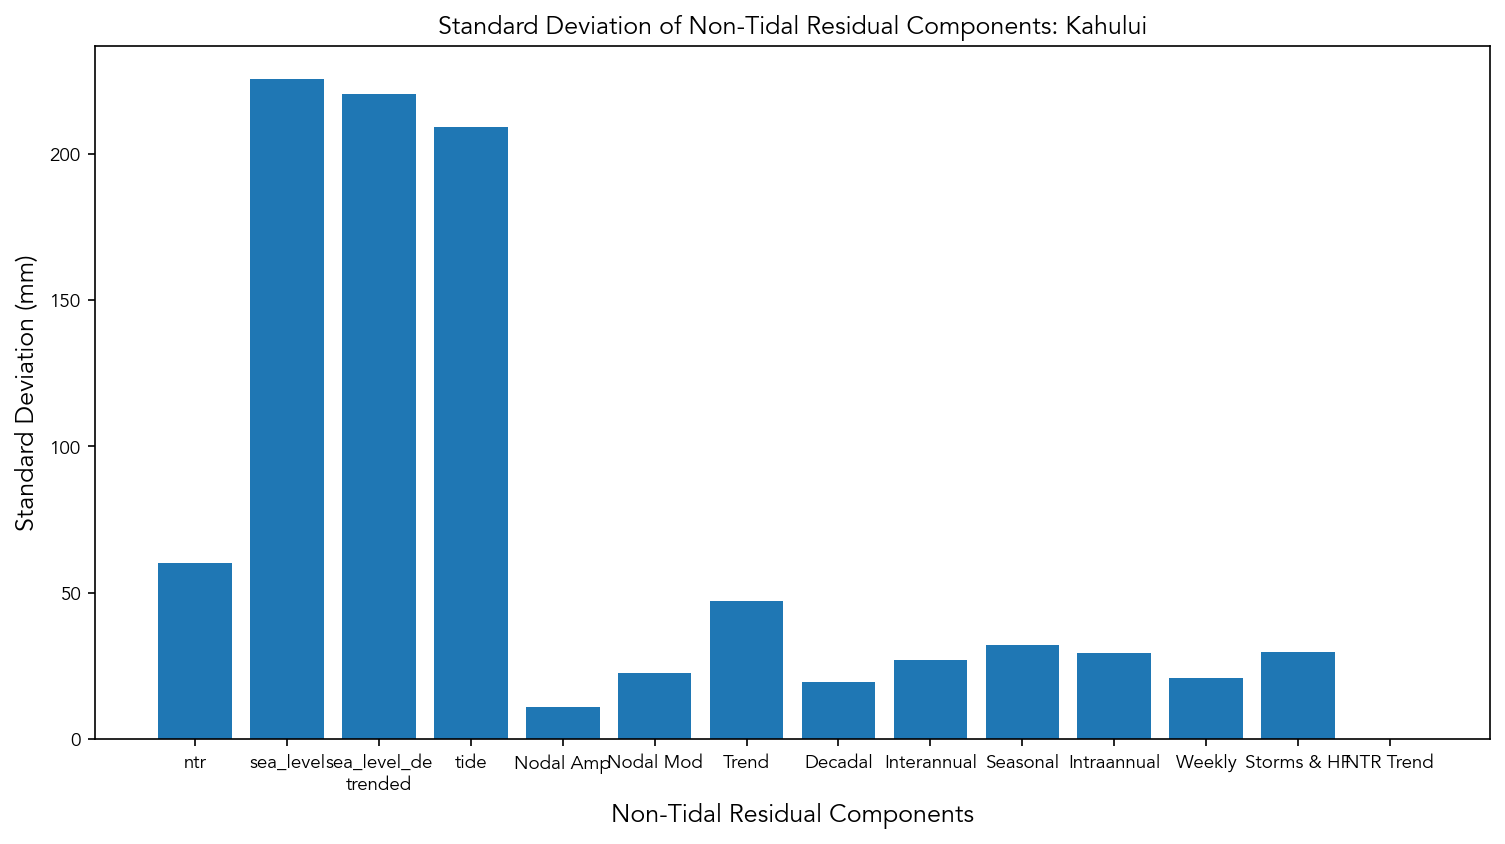

In [541]:
#make a bar plot of the std of each component
import textwrap

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(ntr_component_stds.index, ntr_component_stds)
wrapped_labels = ['\n'.join(textwrap.wrap(label, width=12)) for label in ntr_component_stds.index]
plt.xticks(range(len(ntr_component_stds.index)), wrapped_labels)
# plt.xticks(rotation=45)
ax.set_xlabel('Non-Tidal Residual Components')
ax.set_ylabel('Standard Deviation (mm)')
ax.set_title('Standard Deviation of Non-Tidal Residual Components: ' + station_name)


plt.show()

In [542]:
# does the total variance of the components equal the variance of the ntr?

# get the variance of each component
ntr_component_vars = ntr_filtered.drop(['time','sea_level','sea_level_detrended','tide','ntr','Nodal Amp','Trend'], axis=1).var()

# get the sum of the variances
ntr_component_vars_sum = ntr_component_vars.sum()
# get the variance of the ntr
ntr_var = ntr_data['ntr'].var()

print('Sum of variances of components:', ntr_component_vars_sum)
print('Variance of ntr:', ntr_var)


print('"Wave Height" contributions:', 0.4* np.sqrt(ntr_component_vars_sum))
print('"Wave Height" ntr:', 0.4 * np.sqrt(ntr_var))

ntr_component_vars

# save ntr_component_vars to csv
savepath = Path(data_dir, f'ntr_data/ntr_{station:03d}_component_vars.csv')
ntr_component_vars.to_csv(savepath)



Sum of variances of components: 4847.790975090167
Variance of ntr: 4666.928712975316
"Wave Height" contributions: 27.85043188200906
"Wave Height" ntr: 27.325969224824405


In [543]:
ntr_data

,time,ntr,sea_level,sea_level_detrended,trend,tide,nodal,ntr_withNodal,seasonal_cycle,dayofyear,ntr_detrended
0,1950-10-19 02:00:00,80.018864,1006.0,16.478615,989.521385,-63.540250,19.973256,56.712063,42.070393,292,78.754233
1,1950-10-19 03:00:00,66.567675,945.0,-44.521636,989.521636,-111.089312,6.907013,30.219387,42.045638,292,65.303044
2,1950-10-19 04:00:00,59.303242,914.0,-75.521887,989.521887,-134.825129,-5.653964,10.418755,42.020859,292,58.038611
3,1950-10-19 05:00:00,62.475845,914.0,-75.522138,989.522138,-137.997983,-16.019093,3.251030,41.996058,292,61.211214
4,1950-10-19 06:00:00,51.568852,914.0,-75.522389,989.522389,-127.091240,-23.102491,-14.714538,41.971234,292,50.304221
...,...,...,...,...,...,...,...,...,...,...,...
651209,2025-01-31 19:00:00,149.596275,1203.0,50.092970,1152.907030,-99.503306,18.978705,182.949894,-15.584577,31,148.420307
651210,2025-01-31 20:00:00,144.742653,1116.0,-36.907281,1152.907281,-181.649934,12.712314,171.842478,-15.597175,31,143.566685
651211,2025-01-31 21:00:00,134.847742,1093.0,-59.907532,1152.907532,-194.755274,5.054915,154.302767,-15.609773,31,133.671774
651212,2025-01-31 22:00:00,109.796030,1119.0,-33.907783,1152.907783,-143.703813,-2.613613,121.595126,-15.622373,31,108.620062


In [544]:
# "wave height" of each component
ntr_component_waveheight = ntr_cumsum_stds/10 *2
ntr_component_waveheight

# add long-term trend to the "wave height" stack, get trend value from Jan 1993 to Jan 2023
# get trend rate from ntr_data['trend'] 
SLR = ntr_data[['trend','time']].copy()
# set time as index
SLR['time'] = pd.to_datetime(SLR['time'])
SLR.set_index('time', inplace=True)
# get the slope of the trend - it is linear so just a-b over time
SLR_mm_day = (SLR['trend'].iloc[-1] - SLR['trend'].iloc[0]) / (SLR.index[-1] - SLR.index[0]).days 

SLR_cm30yr = SLR_mm_day*365.25/10 # convert to cm/yr

ntr_component_waveheight = pd.concat([pd.Series(SLR_cm30yr, index=['Long-Term Trend']), ntr_component_waveheight+SLR_cm30yr], axis=0)

ntr_component_waveheight


Long-Term Trend     0.219942
NTR Trend           0.225061
Decadal             4.157463
Interannual         7.197548
Seasonal            9.728187
Intraannual        11.635232
Weekly             12.468375
Storms & HF        13.876788
dtype: float64

## Plot components
Make a bar plot of average contributions to water levels.

/var/folders/9w/vpws17h965v7n60fmhp97k5r0000gq/T/ipykernel_42258/138255805.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.bar('Components', ntr_component_waveheight[i], bottom=0, label=ntr_component_waveheight.index[i].replace('\n', ' '))


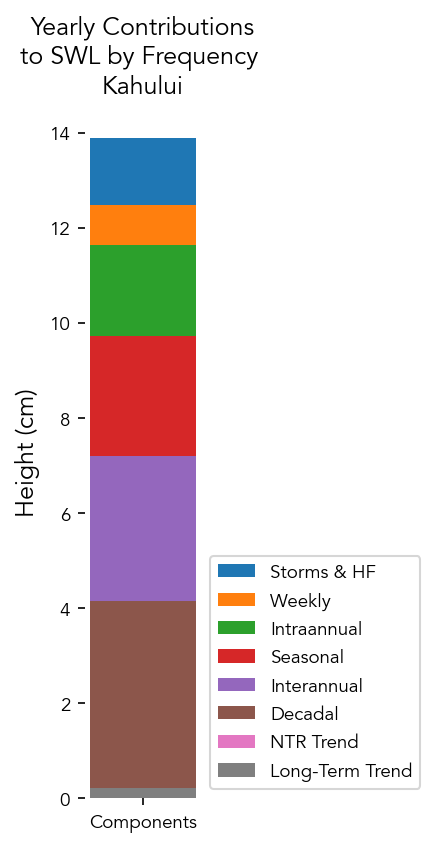

In [545]:
# Create figure
fig, ax = plt.subplots(figsize=(1, 6))
# ntr_component_vars_cumsum = ntr_component_vars.cumsum()/ntr_component_vars_sum * ntr_var #normalize to the variance of the ntr (not filtered)
# Plot stacked bars
bottom = 0
for i in range(len(ntr_component_waveheight.index)-1, -1, -1):
    ax.bar('Components', ntr_component_waveheight[i], bottom=0, label=ntr_component_waveheight.index[i].replace('\n', ' '))

# ax.bar('Total NTR', np.std(ntr_filled), color='white', edgecolor='black', linewidth=1)

# Labels and title
ax.set_ylabel('Height (cm)')
ax.set_title('Yearly Contributions\nto SWL by Frequency \n' + station_name)
ax.legend(loc='lower left', bbox_to_anchor=(1, 0))
# plt.xticks(rotation=45)
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# no box
for spine in ax.spines.values():
    spine.set_visible(False)

figName = 'NTR_components_stds' + station_name
glue('NTR_components_stds',fig,display=False)

# save the wave height to csv
savepath = Path(data_dir, f'ntr_data/ntr_{station:03d}_component_waveheight.csv')
ntr_component_waveheight.to_csv(savepath)

# save the figure to output directory
fig.savefig(output_dir / ('1.1.2_' + figName + '.png'), dpi=300, bbox_inches='tight')


In [546]:
# combine all Path(data_dir, f'ntr_data/ntr_{station:03d}_component_waveheight.csv') into one plot
# get all the csv files in ntr_data
import glob
# get all the csv files in ntr_data
ntr_data_dir = Path(data_dir, 'ntr_data')
ntr_data_files = glob.glob(os.path.join(ntr_data_dir, '*component_waveheight.csv'))

# Read and tag each file
df_list = []
for file in ntr_data_files:
    df = pd.read_csv(file, index_col=None)

    station = int(Path(file).stem.split('_')[1])  # extract station number
    df.columns = ['station',station]
    df_list.append(df)

# Combine into one DataFrame

ntr_combined = pd.concat(
    {df.columns[1]: df.set_index('station').iloc[:, 0] for df in df_list},
    axis=1
)

ntr_combined = ntr_combined[sorted(ntr_combined.columns)]

ntr_combined
# # subtract first row from all rows
# ntr_combined = ntr_combined.sub(ntr_combined.iloc[0], axis=1)
# # delete the first row
# ntr_combined = ntr_combined.drop(ntr_combined.index[0])
#divide all by the last row
ntr_combined_norm = ntr_combined.div(ntr_combined.iloc[-1], axis=1)
ntr_combined_norm

,25,59
station,,
Long-Term Trend,0.439670,0.015850
NTR Trend,0.440001,0.016219
Decadal,0.539645,0.299598
Interannual,0.731559,0.518675
Seasonal,0.864245,0.701040
Intraannual,0.946727,0.838467
Weekly,0.974139,0.898506
Storms & HF,1.000000,1.000000


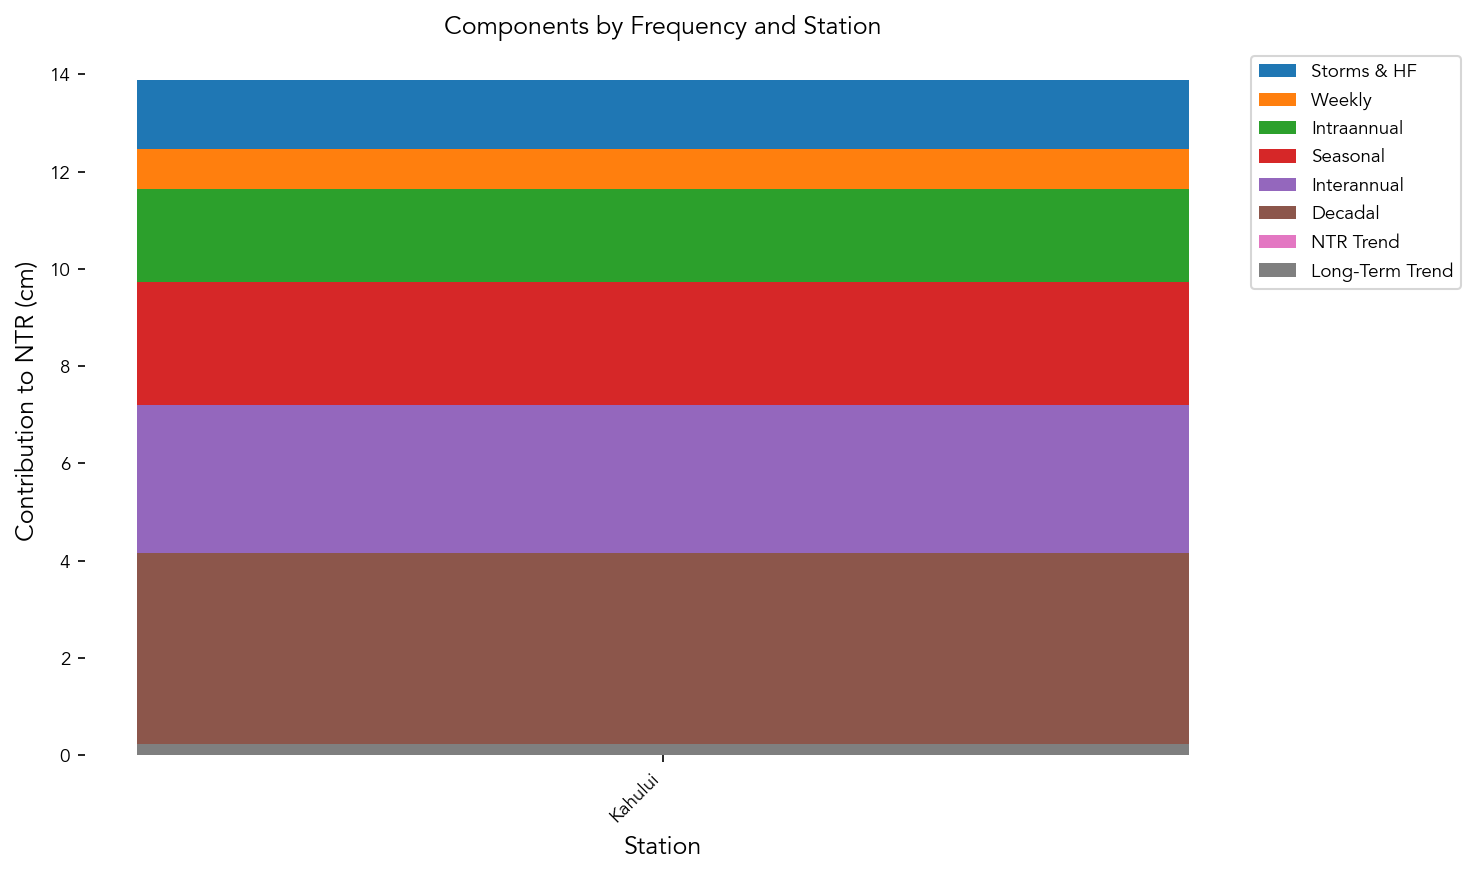

In [547]:
import matplotlib.pyplot as plt
import numpy as np

# Set up figure
fig, ax = plt.subplots(figsize=(10, 6))  # adjust width based on number of stations

# Station names and component labels
stations = ntr_combined.columns

# remove 552
# stations = [station for station in stations if station != 552]
stations = [station for station in stations if station != 548]
stations = [station for station in stations if station != 14]
stations = [station for station in stations if station != 547]



# only include stations in ds
stations = [station for station in stations if station in ds.record_id.values]

# remove French Frigate, Kaumalapau, and Barbers Point


# get latitude of stations
latitudes = ds.lat.sel(record_id=stations).values
# sort by latitude

sorted_indices = np.argsort(latitudes)
# sort stations by latitude
stations = np.array(stations)[sorted_indices]

# Get the components
ntr_combined_norm = ntr_combined_norm[stations]
ntr_combined = ntr_combined[stations]
components = ntr_combined.index
x = np.arange(len(stations))  # one x-position per station

# Set color palette
colors = plt.cm.tab20(np.linspace(0, 1, len(components)))

# Plot each component
bottom = np.zeros(len(stations))
for i, component in reversed(list(enumerate(components))):
    heights = ntr_combined.loc[component].values
    ax.bar(x, heights, bottom=0, label=component.replace('\n', ' '))
    bottom += heights

#names of stations instead of numbers, make a dictionary
station_names = ds.station_name.sel(record_id=stations).values

# Customize axes
ax.set_ylabel("Contribution to NTR (cm)")
ax.set_xlabel("Station")
ax.set_title("Components by Frequency and Station")
ax.set_xticks(x)
ax.set_xticklabels(station_names, rotation=45, horizontalalignment='right')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Remove box
for spine in ax.spines.values():
    spine.set_visible(False)

plt.tight_layout()
plt.show()



It's important to note that in the plot above, we're looking at the $4\sigma$, which is akin to 'significant wave height.' Nor do we consider each $\sigma$ independently in this plot, but instead we compute the standard deviation of the combined signals, as we work our way up to higher and higher frequencies. For example, the purple line above shows the contributions of any cycles that occur on timescales longer than 1 year. Each individual componenent has its own standard deviation but none are truly indepedent signals (due to the filtering mechanism here) and therefore the variances cannot be directly added together to represent the total variances of the whole signal. (See the correlation plot above.)

In [548]:
# get dates of extreme events
station_name_1st = station_name.split(',')[0]
top10tableName = 'SL_top_10_table_' + station_name_1st + '.csv'

#temporarily set the output_dir to ../output CHANGE THIS BACK ONCE DONE
# output_dir = Path('../output')
# get the home directory
home_dir = Path.home()
extremes_csv = Path(home_dir,'Documents','SL_Hawaii_data','output', top10tableName)
extremes = pd.read_csv(extremes_csv)

In [549]:
extremes

,Rank,Highest,Highest Date,Highest ONI Mode,Lowest,Lowest Date,Lowest ONI Mode,Zone,ONI max,ONI min
0,1,0.496,2015-09-17 15:00,El Nino,-2.016,2011-03-11 15:00,La Nina,GMT,2.42,-0.93
1,2,0.477,1994-10-04 23:00,Neutral,-1.024,2010-02-28 03:00,El Nino,GMT,0.74,0.84
2,3,0.474,1995-11-24 14:00,La Nina,-0.952,2011-12-25 06:00,La Nina,GMT,-0.98,-0.86
3,4,0.461,2020-12-15 14:00,La Nina,-0.943,1998-06-24 18:00,Neutral,GMT,-1.19,-0.78
4,5,0.458,2017-08-21 00:00,Neutral,-0.933,1999-01-02 06:00,La Nina,GMT,-0.38,-1.55
5,6,0.453,2021-12-05 14:00,Neutral,-0.923,2001-06-24 21:00,Neutral,GMT,-0.98,-0.08
6,7,0.448,2024-12-15 13:00,Neutral,-0.921,2009-05-25 19:00,Neutral,GMT,-0.53,0.28
7,8,0.445,2024-07-21 01:00,Neutral,-0.911,2009-06-23 18:00,Neutral,GMT,-0.11,0.45
8,9,0.443,2019-12-26 13:00,Neutral,-0.910,2009-01-10 05:00,Neutral,GMT,0.50,-0.85
9,10,0.440,2024-08-20 01:00,Neutral,-0.903,2010-01-01 07:00,El Nino,GMT,-0.21,1.50


In [550]:
extremes_highest = extremes['Highest Date'].values
extremes_lowest = extremes['Lowest Date'].values

# CAUTION MANUAL ENTRY HERE
# add Oct 19 2024 8 am to extremes_highest for Nuku'alofa
# extremes_highest = np.append(extremes_highest, pd.to_datetime('2024-10-19 08:00:00'))

extremes_highest = pd.to_datetime(extremes_highest)
extremes_lowest = pd.to_datetime(extremes_lowest)

extremes_highest





DatetimeIndex(['2015-09-17 15:00:00', '1994-10-04 23:00:00',
               '1995-11-24 14:00:00', '2020-12-15 14:00:00',
               '2017-08-21 00:00:00', '2021-12-05 14:00:00',
               '2024-12-15 13:00:00', '2024-07-21 01:00:00',
               '2019-12-26 13:00:00', '2024-08-20 01:00:00'],
              dtype='datetime64[ns]', freq=None)

In [551]:
# extract these dates from the ntr filtered data
ntr_filtered_extremes_high = ntr_filtered[ntr_filtered['time'].isin(extremes_highest)].copy()
ntr_filtered_extremes_low = ntr_filtered[ntr_filtered['time'].isin(extremes_lowest)].copy()

# get tide data for these dates from ntr_data
tide_data = ntr_data['tide']
ntr_data_extremes_high = ntr_data[ntr_data['time'].isin(extremes_highest)].copy()
ntr_data_extremes_low = ntr_data[ntr_data['time'].isin(extremes_lowest)].copy()

# add tide and sea level data to ntr_filtered_extremes_high
ntr_filtered_extremes_high.loc[:, 'tide'] = ntr_data_extremes_high['tide'].values
ntr_filtered_extremes_high.loc[:, 'sea_level'] = ntr_data_extremes_high['sea_level'].values
ntr_filtered_extremes_low.loc[:, 'tide'] = ntr_data_extremes_low['tide'].values
ntr_filtered_extremes_low.loc[:, 'sea_level'] = ntr_data_extremes_low['sea_level'].values


# arrange columns
# if rec_length < 35*365.25:
column_order = ['time', 'ntr', 'sea_level', 'sea_level_detrended', 'tide', 'Trend','Nodal Amp','Nodal Mod',  'Decadal', 'Interannual', 'Seasonal','Intraannual', 'Weekly', 'Storms & HF']
# else:
    # column_order = ['time', 'ntr', 'sea_level', 'tide', 'Nodal Amp','Nodal Mod','Interdecadal', 'Decadal', 'Interannual', 'Seasonal','Intraannual', 'Weekly', 'Storms & HF']
ntr_filtered_extremes_high = ntr_filtered_extremes_high[column_order]
ntr_filtered_extremes_low = ntr_filtered_extremes_low[column_order]
ntr_filtered_extremes_high

#export data
ntr_filtered_extremes_high.to_csv('../data/ntr_filtered_extremes_high_' + f'station{station:03d}'+ '.csv', index=False)
ntr_filtered_extremes_low.to_csv('../data/ntr_filtered_extremes_low_' + f'station{station:03d}'+ '.csv', index=False)


In [552]:
ntr_filtered_extremes_high[['ntr', 'sea_level', 'time','Trend']].sort_values(by='sea_level', ascending=False)

,ntr,sea_level,time,Trend
569029,452.475707,1860.0,2015-09-17 15:00:00,1132.288408
385365,396.512056,1841.0,1994-10-04 23:00:00,1086.207870
395340,204.917862,1838.0,1995-11-24 14:00:00,1088.710556
615012,128.983891,1825.0,2020-12-15 14:00:00,1143.825353
585910,148.003935,1822.0,2017-08-21 00:00:00,1136.523781
623532,89.173806,1817.0,2021-12-05 14:00:00,1145.962986
650075,95.985591,1812.0,2024-12-15 13:00:00,1152.622515
646535,110.482378,1809.0,2024-07-21 01:00:00,1151.734343
606491,160.774039,1807.0,2019-12-26 13:00:00,1141.687469
647255,71.177889,1804.0,2024-08-20 01:00:00,1151.914988


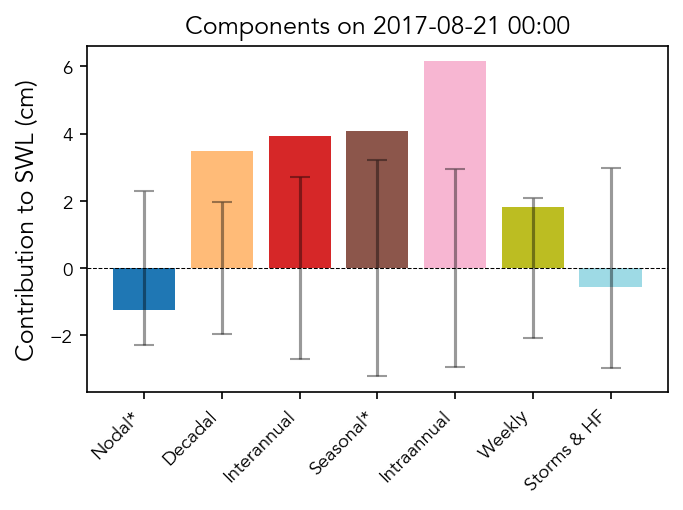

In [553]:
# make separate plot for comparison of event size vs climatology

idx = 3

sl_extreme = ntr_filtered_extremes_high['sea_level'].iloc[idx]
dates_to_plot = ntr_filtered_extremes_high['time'].values[idx]
date_str = pd.to_datetime(dates_to_plot).strftime('%Y-%m-%d %H:%M')
data_on_date = ntr_filtered_extremes_high[ntr_filtered_extremes_high['time'] == dates_to_plot]


# Extract the components
components = column_order[5:]
# remove 'Nodal Mod' from components
components.remove('Nodal Amp')
components.remove('Trend')
component_values = data_on_date[components].values.flatten()
x_positions = np.arange(len(components))  # Positions for each component
y_stds = 0.1*ntr_component_stds[components].values.flatten()

# we want to include the y_stds from Nodal Mod, but not Nodal Amp, so replace the y_stds with the std of Nodal Mod
# y_stds[components.index('Nodal Amp')] = 0.2*ntr_component_stds['Nodal Mod']


fig, ax = plt.subplots(1, 1, figsize=(5, 3))

# assign 1 color to each component. There are XX components, so we need XX colors
colors = plt.cm.tab20(np.linspace(0, 1, len(components)))


### --- TOP LEFT PLOT: Bar Chart --- ###
bar_width = 0.2
ax.bar(x_positions, 0.1*component_values, alpha=1, color=colors)
ax.errorbar(x_positions, np.zeros_like(x_positions), yerr=y_stds, fmt='none', color='black',alpha=0.4, markersize=3, capsize=5, label='Standard Deviation')

ax.set_xticks(x_positions)

# replace 'Nodal Amp' with 'Nodal' in the x-ticks
components = [comp.replace('Nodal Mod', 'Nodal*') for comp in components]
components = [comp.replace('Seasonal','Seasonal*') for comp in components]
ax.set_xticklabels(components, rotation=45, ha='right')

# Title and labels
ax.set_title('Components on ' + date_str)
ax.set_ylabel('Contribution to SWL (cm)')

# Add dotted line at 0
ax.axhline(0, color='black', linestyle='--', linewidth=0.5)

# save figure
figName = 'NTR_components_' + station_name + '_' + date_str

# go back to the original output_dir
fig.savefig(output_dir / ('1.1.2_' + figName + '.png'), dpi=300, bbox_inches='tight')

In [554]:
# Verify if 'ntr' matches the sum of components (excluding 'Nodal Mod' and 'Seasonal')
ntr_actual = data_on_date['ntr'].values[0]
ntr_sum = component_values.sum() - data_on_date['Nodal Mod'] - data_on_date['Seasonal']

if np.isclose(ntr_actual, ntr_sum):
    print("NTR is equal to the sum of the components.")
else:
    print("NTR is NOT equal to the sum of the components.")
    print(f"NTR: {ntr_actual}")
    print(f"Sum of components: {ntr_sum}")

NTR is equal to the sum of the components.


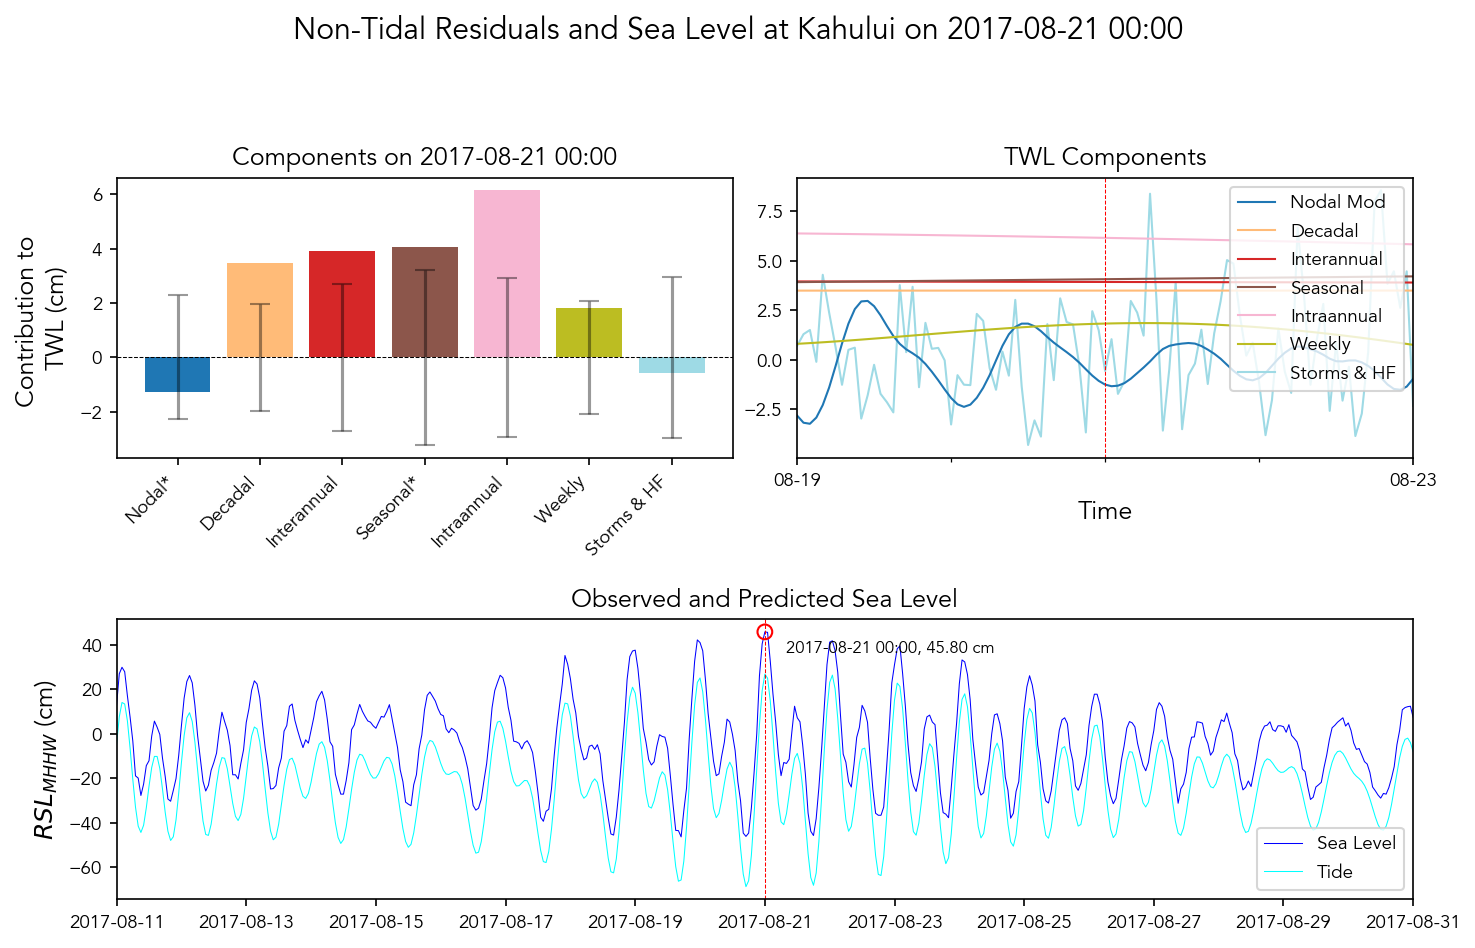

In [555]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np

idx = 3

sl_extreme = ntr_filtered_extremes_high['sea_level'].iloc[idx]
dates_to_plot = ntr_filtered_extremes_high['time'].values[idx]
date_str = pd.to_datetime(dates_to_plot).strftime('%Y-%m-%d %H:%M')
data_on_date = ntr_filtered_extremes_high[ntr_filtered_extremes_high['time'] == dates_to_plot]

# Extract the components
components = column_order[4:]
# remove 'Nodal Mod' from components
components.remove('Nodal Amp')
component_values = data_on_date[components].values.flatten()

# set tide and trend relative to MHHW
component_values[components.index('tide')] -= 0.1*mhhw + 0.1*msl
# # do the same for the trend
component_values[components.index('Trend')] -= 0.1*mhhw + 0.1*msl

# remove tide and trend

component_values = np.delete(component_values, [components.index('tide'), components.index('Trend')])
components.remove('tide')
components.remove('Trend')

x_positions = np.arange(len(components))  # Positions for each component

fig, axes = plt.subplots(2, 2, figsize=(10, 6), gridspec_kw={'height_ratios': [1, 1], 'width_ratios': [1, 1]})

# assign 1 color to each component. There are XX components, so we need XX colors
colors = plt.cm.tab20(np.linspace(0, 1, len(components)))


### --- TOP LEFT PLOT: Bar Chart --- ###
ax = axes[0, 0]  # First row, first column
ax.bar(x_positions, 0.1*component_values, alpha=1, color=colors)
ax.errorbar(x_positions, np.zeros_like(x_positions), yerr=y_stds, fmt='none', color='black',alpha=0.4, markersize=3, capsize=5, label='Standard Deviation')

ax.set_xticks(x_positions)

# replace 'Nodal Amp' with 'Nodal' in the x-ticks
componentLables = [comp.replace('Nodal Mod', 'Nodal*') for comp in components]
componentLables = [comp.replace('Seasonal','Seasonal*') for comp in componentLables]
ax.set_xticklabels(componentLables, rotation=45, ha='right')



# Title and labels
ax.set_title('Components on ' + date_str)
ax.set_ylabel('Contribution to \nTWL (cm)')

# Add dotted line at 0
ax.axhline(0, color='black', linestyle='--', linewidth=0.5)

# Resize subplot width
box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.5, box.height])  # Shrink width to 75%

### --- TOP RIGHT PLOT: NTR & Weekly Trends --- ###
ax = axes[0, 1]  # First row, second column

# Filter data to ±10 days around `dates_to_plot`
plusTime = pd.Timedelta('2d')
timespan = pd.date_range(start=dates_to_plot - plusTime, end=dates_to_plot + plusTime, freq='h')

# Ensure time is a datetime index
data_on_date = ntr_filtered[ntr_filtered['time'].isin(timespan)].copy()
data_on_date.set_index('time', inplace=True)

# Plot NTR and Weekly trends
# ax.plot(data_on_date.index, 0.1*data_on_date['ntr'], label='NTR', color='black', linewidth=0.5)
for col in data_on_date.columns:
    #only do for columns that aren't tide or sea level
    if col not in ['sea_level','sea_level_detrended','tide','NTR','ntr','Storms & HF','NTR Trend','Nodal Amp','Trend']:
        col_index = components.index(col)
        ax.plot(data_on_date.index, 0.1*data_on_date[col], label=col, color = colors[col_index],linewidth=1)
    if col == 'Storms & HF': #put on the bottom
        col_index = components.index(col)
        ax.plot(data_on_date.index, 0.1*data_on_date[col], label=col, color = colors[col_index],linewidth=1,zorder=0)

# nodal_daily = data_on_date['Nodal Mod'].resample('D').max()
# ax.plot(nodal_daily.index, 0.1*nodal_daily, label='Nodal Daily', color='green', linewidth=1)

ax.axvline(dates_to_plot, color='red', linestyle='--', linewidth=0.5)

#ensure x-axis is readable
ax.xaxis.set_major_locator(mdates.DayLocator(interval=10))
ax.xaxis.set_minor_locator(mdates.DayLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))
ax.set_xlim([timespan[0], timespan[-1]])
ax.set_title('TWL Components')
ax.set_xlabel('Time')
ax.legend(loc='upper right')

### --- BOTTOM PLOT: Sea Level, Tide, and Interannual --- ###
fig.delaxes(axes[1, 1])
fig.delaxes(axes[1, 0])
ax = fig.add_subplot(2, 1, 2)

# Filter data to ±100 days around `dates_to_plot`
plusTime = pd.Timedelta('10d')
timespan = pd.date_range(start=dates_to_plot - plusTime, end=dates_to_plot + plusTime, freq='h')

# Ensure time is a datetime index
data_on_date = ntr_filtered[ntr_filtered['time'].isin(timespan)].copy()
data_on_date.set_index('time', inplace=True)

# Plot sea level, tide, and interannual trend
ax.plot(data_on_date.index, 0.1*(data_on_date['sea_level'] - mhhw), label='Sea Level', color='blue', linewidth=0.5)
ax.plot(data_on_date.index, 0.1*(data_on_date['tide']+data_on_date['sea_level']-data_on_date['sea_level_detrended']-mhhw), label='Tide', color='cyan', linewidth=0.5)
# ax.plot(data_on_date.index, 0.1*(data_on_date['ntr_withNodal'] - mhhw), label='Interannual', color='orange', linewidth=0.5)
ax.set_ylabel('$RSL_{MHHW}$ (cm)')

# Add legend and vertical line
ax.legend(loc='lower right')

# add circle at the date and height
ax.scatter(dates_to_plot, 0.1*(sl_extreme-mhhw), color='red', s=50, zorder=5, facecolors='none')
ax.annotate(f'{date_str}, {0.1*(sl_extreme-mhhw):.2f} cm', 
             (dates_to_plot, 0.1*(sl_extreme-mhhw)), 
             textcoords='offset points', 
             xytext=(10, -10), 
             ha='left', 
             fontsize=8)

ax.axvline(dates_to_plot, color='red', linestyle='--', linewidth=0.5)

# Set x-axis limits
ax.set_xlim([timespan[0], timespan[-1]])
ax.set_title('Observed and Predicted Sea Level')

# add title to entire figure
fig.suptitle('Non-Tidal Residuals and Sea Level at ' + station_name + ' on ' + date_str, y=1.05)

plt.tight_layout()
plt.show()


# save the file to desktop as a png
figName = 'NTR_components_' + station_name + '_' + date_str
glue(figName,fig,display=False)

savepath = Path(output_dir, figName + '.png')
fig.savefig(savepath, dpi=300, bbox_inches='tight')

# data_on_date


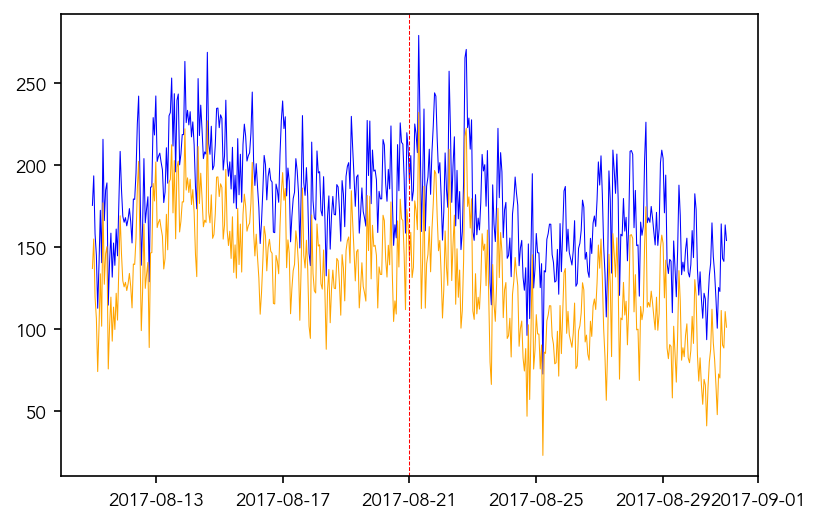

In [556]:
plt.plot(data_on_date.index, data_on_date['sea_level_detrended']-data_on_date['tide'], label='NTR', color='blue', linewidth=0.5)
plt.plot(data_on_date.index, data_on_date['ntr']-5, label='ntr', color='orange', linewidth=0.5)
# plt.plot(data_on_date.index, data_on_date['Nodal Mod'], label='Nodal', color='green', linewidth=0.5)

# add a line for the date
plt.axvline(dates_to_plot, color='red', linestyle='--', linewidth=0.5)

# a line at the date - 6 hours
# plt.axvline(dates_to_plot - pd.Timedelta('7h'), color='red', linestyle='--', linewidth=0.5)


In [557]:
# We need to treat the tide component differently here to get a better comparison
# get the daily high tides
tide_data = ntr_data['tide']
tide_data.index = ntr_data['time']
tide_max_daily = tide_data.resample('D').max()

tide_max_daily_std = tide_max_daily.std()

tide_min_daily = tide_data.resample('D').min()
tide_min_daily_std = tide_min_daily.std()

In [558]:
ntr_filtered_extremes_low

,time,ntr,sea_level,sea_level_detrended,tide,Trend,Nodal Amp,Nodal Mod,Decadal,Interannual,Seasonal,Intraannual,Weekly,Storms & HF
417976,1998-06-24 18:00:00,-161.460175,421.0,-673.389835,-493.725778,1094.389835,59.829971,11.144452,-17.116583,-33.218655,-19.411605,-63.335311,-8.949651,-38.839976
422572,1999-01-02 06:00:00,-132.995917,431.0,-664.542953,-526.975491,1095.542953,61.611322,8.490609,-23.745742,-25.900594,-5.778642,-2.672334,16.054427,-96.731675
444283,2001-06-24 21:00:00,-240.235156,441.0,-659.990153,-401.909272,1100.990153,65.952698,-14.782186,-21.115938,-2.062697,-19.049866,45.919091,13.826322,-276.801934
510435,2009-01-10 05:00:00,-106.482452,454.0,-663.587416,-549.407407,1117.587416,35.495281,-2.969647,-26.823098,-11.749380,-8.892692,-23.209008,-5.288468,-39.412499
513689,2009-05-25 19:00:00,-108.697439,443.0,-675.403831,-526.485686,1118.403831,34.840472,-3.417251,-31.890843,-26.768854,-41.415399,-2.072548,-28.054787,-19.910407
514384,2009-06-23 18:00:00,-100.518452,453.0,-665.578204,-546.037943,1118.578204,34.700616,-4.397509,-32.873987,-28.587911,-20.216406,-3.542456,-16.218247,-19.295851
518981,2010-01-01 07:00:00,-138.030980,461.0,-658.731572,-516.516805,1119.731572,34.722528,1.927199,-38.369684,-21.222157,-5.377759,-2.440647,-7.981079,-68.017413
520369,2010-02-28 03:00:00,-626.679445,340.0,-780.079816,-129.953461,1120.079816,34.742626,17.136229,-39.659912,-12.783764,-24.640692,-22.123055,31.062074,-583.174788
529405,2011-03-11 15:00:00,-1812.331684,-652.0,-1774.346911,65.832680,1122.346911,36.031014,-13.379022,-43.523172,33.315960,-29.040459,-38.080366,-81.310694,-1682.733412
536332,2011-12-25 06:00:00,-189.017587,412.0,-712.084866,-522.237727,1124.084866,38.088630,7.584178,-40.992601,-4.390528,-2.021161,-63.903666,-46.347981,-33.382810


In [559]:

def get_relative_component_amps(ntr_filtered_extremes_high, ntr_component_stds, mhhw, tide_max_daily_std):
    """
    Get the relative amplitude of each component in the non-tidal residuals.
    
    Parameters:
    - ntr_filtered_extremes_high: pd.DataFrame, filtered non-tidal residuals for extreme high sea level events
    - ntr_component_stds: pd.Series, standard deviations of each component
    - mhhw: float, mean higher high water value
    - tide_max_daily_std: float, standard deviation of daily high tides
    
    Returns:
    - ntr_filtered_extremes_high_relative_to_std: pd.DataFrame, relative amplitudes of each component
    """
    # make a copy of the filtered extremes
    extremes_high_relative_to_std = ntr_filtered_extremes_high.copy()

    # get the relative amplitude of the tide component
    extremes_high_relative_to_std['tide'] = (ntr_filtered_extremes_high['tide'] - mhhw)/tide_max_daily_std 
    extremes_high_relative_to_std = extremes_high_relative_to_std.drop(columns=['ntr'])

    # for each component, divide by the std
    for component in extremes_high_relative_to_std.columns[3:]:
        extremes_high_relative_to_std[component] = ntr_filtered_extremes_high[component] / ntr_component_stds[component]

    return extremes_high_relative_to_std

extremes_high_relative_to_std = get_relative_component_amps(ntr_filtered_extremes_high, ntr_component_stds, mhhw, tide_max_daily_std)
extremes_low_relative_to_std = get_relative_component_amps(ntr_filtered_extremes_low, ntr_component_stds, mllw, tide_min_daily_std)


In [560]:
def plot_component_amps(extremes_low_relative_to_std, high_or_low = 'high', station_name = ''):
    import matplotlib.colors as mcolors

    # Create heatmap figure
    fig, ax = plt.subplots(figsize=(7, 6))

    #drop the time column and turn it into the index
    extremes_high_relative_to_std_subset = extremes_low_relative_to_std.set_index('time')
    

    cmap = plt.cm.coolwarm
    colors = [(cmap(0.0)),  # Dark blue at -3
              (cmap(0.45)), # Light blue at -1
              (cmap(0.5)),  # White at 0
              (cmap(0.55)), # Light red at 1
              (cmap(1.0))]  # Dark red at 3
    positions = [-3, -1, 0, 1, 3]  # Assigning key points in data range

    # Create a new colormap
    new_cmap = mcolors.LinearSegmentedColormap.from_list("modified_coolwarm", list(zip(np.linspace(0, 1, len(colors)), colors)))

    # Keep a **linear scale** but use the modified colormap
    norm = mcolors.Normalize(vmin=-3, vmax=3)

    # Plot heatmap
    if high_or_low == 'high':
        #order by highest to lowest sea level
        extremes_high_relative_to_std_subset = extremes_high_relative_to_std_subset.sort_values(by='sea_level', ascending=False)
    if high_or_low == 'low':
        extremes_high_relative_to_std_subset = extremes_high_relative_to_std_subset.sort_values(by='sea_level', ascending=True)

    # drop sea level column
    extremes_high_relative_to_std_subset = extremes_high_relative_to_std_subset.drop(columns=['sea_level','sea_level_detrended','Trend','Nodal Amp'])

    heatmap = ax.imshow(extremes_high_relative_to_std_subset.T, cmap=new_cmap, norm=norm,aspect='auto')

    # label rows and columns
    ax.set_xticks(np.arange(len(extremes_high_relative_to_std_subset)))
    ax.set_xticklabels(extremes_high_relative_to_std_subset.index.strftime('%Y-%m-%d %H:%M'),rotation=60, ha='right')
    ax.set_yticks(np.arange(len(extremes_high_relative_to_std_subset.columns)))
    ax.set_yticklabels(extremes_high_relative_to_std_subset.columns)

    # add colorbar, should be same height as heatmap
    cbar = fig.colorbar(heatmap, ax=ax, fraction=0.04, pad=0.04)
    cbar.set_label('Relative Amplitude\n (Standard Deviations)')

    # if high_or_low is high, then "Highest"
    if high_or_low == 'high':
        ax.set_title('Extreme High Sea Level Events:\nRelative Amplitudes of Non-Tidal Residual Components\n' + station_name)
    elif high_or_low == 'low':
        ax.set_title('Extreme Low Sea Level Events:\nRelative Amplitudes of Non-Tidal Residual Components\n' + station_name)

    return fig, ax

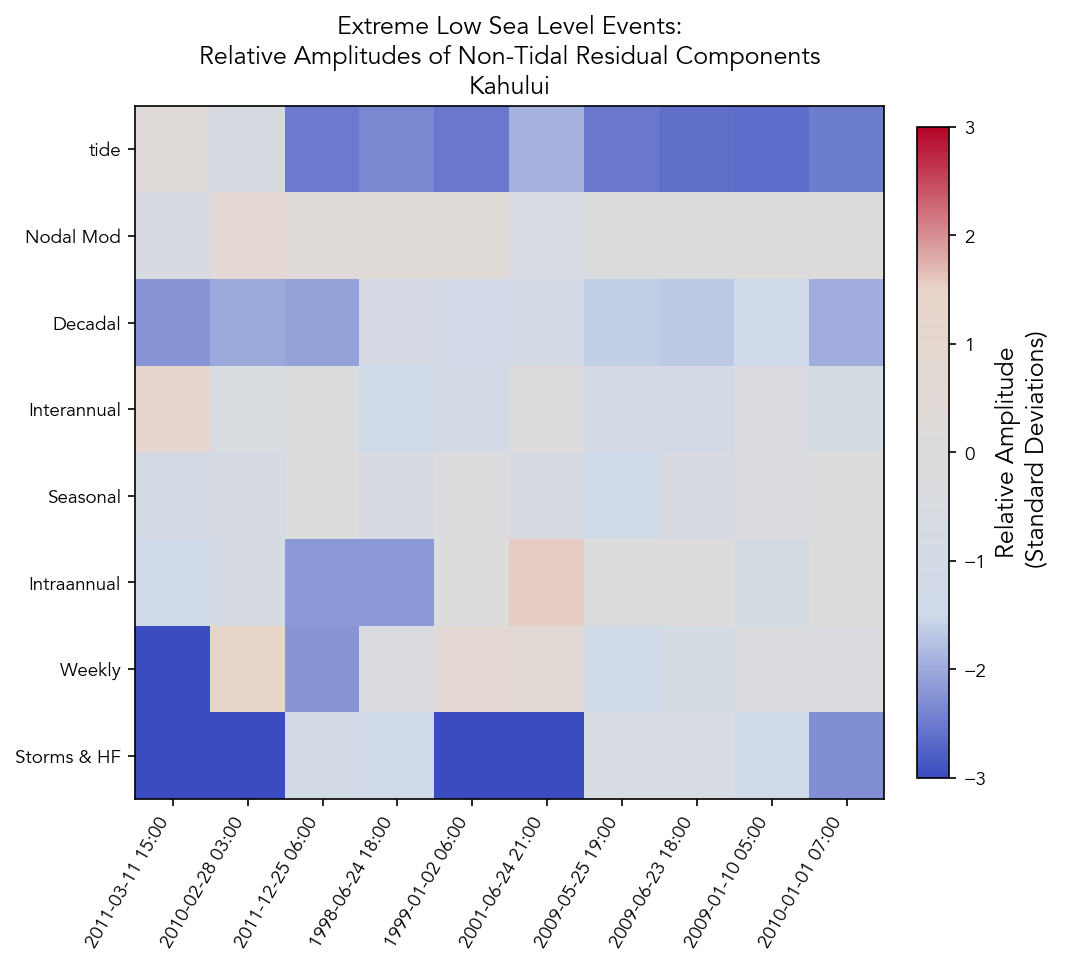

In [561]:
fig,ax = plot_component_amps(extremes_low_relative_to_std, high_or_low = 'low',station_name = station_name)

# save to output
output_path = output_dir / f'SL_rankings_NTR_relative_amplitudes_top10_{station_name}_low.png'
fig.savefig(output_path, bbox_inches='tight')


/Users/juliafiedler/Library/CloudStorage/GoogleDrive-jfiedler@hawaii.edu/Shared drives/PI Indicators 2025/SL Indicators/Hawaii_Region_Output/SL_rankings_NTR_relative_amplitudes_top10_Kahului_high.png


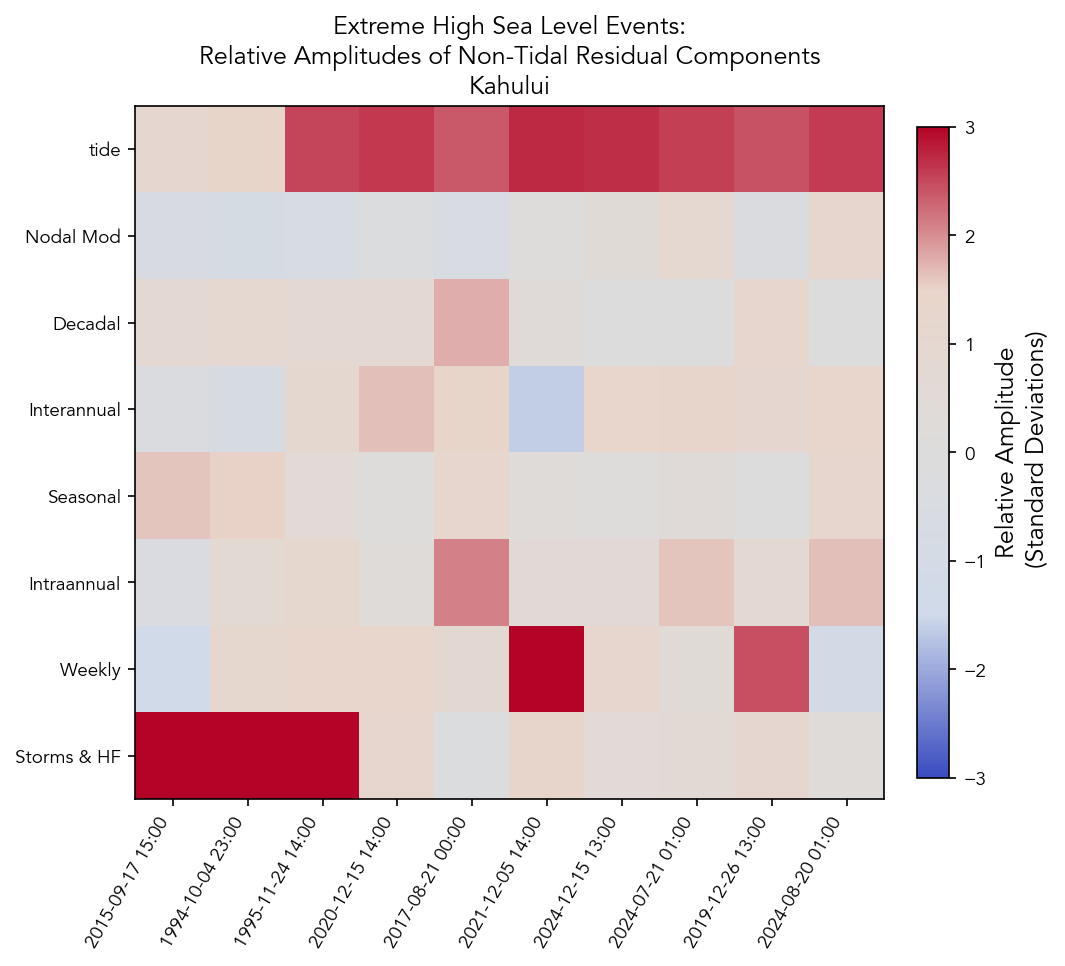

In [562]:
fig, ax = plot_component_amps(extremes_high_relative_to_std, high_or_low = 'high',station_name = station_name)
# save to output
output_path = output_dir / f'SL_rankings_NTR_relative_amplitudes_top10_{station_name}_high.png'

print(output_path)
fig.savefig(output_path, bbox_inches='tight')

## Make a Table


In [563]:
# Now we'll make a nice readable table of the highest and lowest sea level events and their components
# It should be ntr_filtered_extremes_high with the extremes_high_relative_to_std in parentheses

# make a copy of ntr_filtered_extremes_high
extremes_table = ntr_filtered_extremes_high.copy()

# make it relative to mhhw
extremes_table['sea_level'] = extremes_table['sea_level'] - mhhw
extremes_table['tide'] = extremes_table['tide'] - mhhw + extremes_table['Trend']

# print out only :.2f 
extremes_table = extremes_table.round(2)

#rank according to sea level
extremes_table = extremes_table.sort_values(by='sea_level', ascending=False)
extremes_table




,time,ntr,sea_level,sea_level_detrended,tide,Trend,Nodal Amp,Nodal Mod,Decadal,Interannual,Seasonal,Intraannual,Weekly,Storms & HF
569029,2015-09-17 15:00:00,452.48,496.0,727.71,-9.10,1132.29,53.90,-12.93,16.14,-9.75,51.43,-13.22,-29.27,488.58
385365,1994-10-04 23:00:00,396.51,477.0,754.79,30.51,1086.21,43.22,-18.06,18.24,-18.77,48.76,20.00,23.53,353.51
395340,1995-11-24 14:00:00,204.92,474.0,749.29,251.51,1088.71,48.32,-14.49,16.45,25.72,16.36,33.47,29.94,99.33
615012,2020-12-15 14:00:00,128.98,461.0,681.17,328.22,1143.83,64.73,-3.83,15.56,44.21,2.61,5.05,29.76,34.40
585910,2017-08-21 00:00:00,148.00,458.0,685.48,268.20,1136.52,61.75,-12.59,34.85,39.20,40.61,61.47,18.21,-5.72
623532,2021-12-05 14:00:00,89.17,453.0,671.04,353.94,1145.96,61.95,0.01,6.67,-43.77,8.70,16.23,68.61,41.44
650075,2024-12-15 13:00:00,95.99,448.0,659.38,348.17,1152.62,48.61,11.09,-1.37,38.62,2.67,17.61,26.04,15.08
646535,2024-07-21 01:00:00,110.48,445.0,657.27,322.99,1151.73,48.61,20.29,-1.36,37.72,10.35,47.30,8.63,18.18
606491,2019-12-26 13:00:00,160.77,443.0,665.31,283.59,1141.69,65.76,-7.89,24.89,28.47,-2.55,24.52,50.91,32.00
647255,2024-08-20 01:00:00,71.18,440.0,652.09,327.58,1151.91,48.61,26.62,-1.36,38.20,40.07,48.48,-19.58,5.43


In [564]:
# check if extremes table everything from interdecadal to storms & hf added equals ntr
extremes_table['sum'] = extremes_table['Decadal'] + extremes_table['Interannual'] + extremes_table['Seasonal'] + extremes_table['Intraannual'] + extremes_table['Weekly'] + extremes_table['Storms & HF']
#print both columns
extremes_table[['ntr','sum']]

,ntr,sum
569029,452.48,503.91
385365,396.51,445.27
395340,204.92,221.27
615012,128.98,131.59
585910,148.00,188.62
623532,89.17,97.88
650075,95.99,98.65
646535,110.48,120.82
606491,160.77,158.24
647255,71.18,111.24


In [565]:
# make time the index
# extremes_table = extremes_table.set_index('time')

#change everything except time column to cm
extremes_table.iloc[:,1:] = extremes_table.iloc[:,1:]*0.1

#format time to be more readable
# extremes_table['time'] = extremes_table['time'].dt.strftime('%Y-%m-%d %H:%M')

# round to 2 decimal places
extremes_table = extremes_table.round(1)

extremes_table
# remove sum column
extremes_table = extremes_table.drop(columns='sum')

# put sea_level in first column
extremes_table = extremes_table[['time','sea_level','tide','ntr','Nodal Mod','Decadal','Interannual','Seasonal','Intraannual','Weekly','Storms & HF']]


In [566]:
extremes_table

,time,sea_level,tide,ntr,Nodal Mod,Decadal,Interannual,Seasonal,Intraannual,Weekly,Storms & HF
569029,2015-09-17 15:00:00,49.6,-0.9,45.2,-1.3,1.6,-1.0,5.1,-1.3,-2.9,48.9
385365,1994-10-04 23:00:00,47.7,3.1,39.7,-1.8,1.8,-1.9,4.9,2.0,2.4,35.4
395340,1995-11-24 14:00:00,47.4,25.2,20.5,-1.4,1.6,2.6,1.6,3.3,3.0,9.9
615012,2020-12-15 14:00:00,46.1,32.8,12.9,-0.4,1.6,4.4,0.3,0.5,3.0,3.4
585910,2017-08-21 00:00:00,45.8,26.8,14.8,-1.3,3.5,3.9,4.1,6.1,1.8,-0.6
623532,2021-12-05 14:00:00,45.3,35.4,8.9,0.0,0.7,-4.4,0.9,1.6,6.9,4.1
650075,2024-12-15 13:00:00,44.8,34.8,9.6,1.1,-0.1,3.9,0.3,1.8,2.6,1.5
646535,2024-07-21 01:00:00,44.5,32.3,11.0,2.0,-0.1,3.8,1.0,4.7,0.9,1.8
606491,2019-12-26 13:00:00,44.3,28.4,16.1,-0.8,2.5,2.8,-0.3,2.5,5.1,3.2
647255,2024-08-20 01:00:00,44.0,32.8,7.1,2.7,-0.1,3.8,4.0,4.8,-2.0,0.5


In [567]:
clear formatted_table

In [568]:
# now combine extremes_table with extremes_high_relative_to_std
extremes_table_relative = extremes_table.copy()
extremes_table_relative = extremes_table_relative.set_index('time')
std_table = extremes_high_relative_to_std.copy()
std_table = std_table.set_index('time')

#sort both on sea_level
extremes_table_relative = extremes_table_relative.sort_values(by='sea_level', ascending=False)
std_table = std_table.sort_values(by='sea_level', ascending=False)

extremes_table_relative

# Find common columns
common_columns = extremes_table_relative.columns.intersection(std_table.columns)

# Select only common columns from both tables
extremes_common = extremes_table_relative[common_columns]
std_common = std_table[common_columns]

# Rename std columns to make them distinct
std_common = std_common.rename(columns={col: f"{col}_std" for col in common_columns})

# Interleave columns (merge column-by-column)
interleaved_columns = sum(zip(extremes_common.columns, std_common.columns), ())  # Creates interleaved column order

# Combine the tables, ensuring interleaved order
formatted_table = pd.concat([extremes_common, std_common], axis=1)[list(interleaved_columns)]

# Add back 'sea_level' and 'ntr' at the front
formatted_table = pd.concat([extremes_table_relative[['sea_level', 'ntr']], formatted_table], axis=1)

#drop sea_level_std column
formatted_table = formatted_table.drop(columns=['sea_level_std','sea_level'])

# add 'sea level' column back in front
formatted_table.insert(0, 'sea_level', extremes_table_relative['sea_level'])

# format all to 1 decimal place
formatted_table = formatted_table.round(1)

formatted_table


,sea_level,ntr,tide,tide_std,Nodal Mod,Nodal Mod_std,Decadal,Decadal_std,Interannual,Interannual_std,Seasonal,Seasonal_std,Intraannual,Intraannual_std,Weekly,Weekly_std,Storms & HF,Storms & HF_std
time,,,,,,,,,,,,,,,,,,
2015-09-17 15:00:00,49.6,45.2,-0.9,1.1,-1.3,-0.6,1.6,0.8,-1.0,-0.4,5.1,1.6,-1.3,-0.5,-2.9,-1.4,48.9,16.5
1994-10-04 23:00:00,47.7,39.7,3.1,1.5,-1.8,-0.8,1.8,0.9,-1.9,-0.7,4.9,1.5,2.0,0.7,2.4,1.1,35.4,11.9
1995-11-24 14:00:00,47.4,20.5,25.2,2.5,-1.4,-0.6,1.6,0.8,2.6,1.0,1.6,0.5,3.3,1.1,3.0,1.4,9.9,3.3
2020-12-15 14:00:00,46.1,12.9,32.8,2.6,-0.4,-0.2,1.6,0.8,4.4,1.6,0.3,0.1,0.5,0.2,3.0,1.4,3.4,1.2
2017-08-21 00:00:00,45.8,14.8,26.8,2.4,-1.3,-0.6,3.5,1.8,3.9,1.5,4.1,1.3,6.1,2.1,1.8,0.9,-0.6,-0.2
2021-12-05 14:00:00,45.3,8.9,35.4,2.7,0.0,0.0,0.7,0.3,-4.4,-1.6,0.9,0.3,1.6,0.6,6.9,3.3,4.1,1.4
2024-12-15 13:00:00,44.8,9.6,34.8,2.7,1.1,0.5,-0.1,-0.1,3.9,1.4,0.3,0.1,1.8,0.6,2.6,1.2,1.5,0.5
2024-07-21 01:00:00,44.5,11.0,32.3,2.6,2.0,0.9,-0.1,-0.1,3.8,1.4,1.0,0.3,4.7,1.6,0.9,0.4,1.8,0.6
2019-12-26 13:00:00,44.3,16.1,28.4,2.4,-0.8,-0.3,2.5,1.3,2.8,1.1,-0.3,-0.1,2.5,0.8,5.1,2.4,3.2,1.1


In [569]:
formatted_table_time = formatted_table.reset_index()
formatted_table_time['time'] = formatted_table_time['time'].dt.strftime('%Y-%m-%d %H:%M')
formatted_table_time = formatted_table_time.rename(columns={'Storms & HF_std': 'Storms_std'})

formatted_table_time.columns
GT(formatted_table_time)

time,sea_level,ntr,tide,tide_std,Nodal Mod,Nodal Mod_std,Decadal,Decadal_std,Interannual,Interannual_std,Seasonal,Seasonal_std,Intraannual,Intraannual_std,Weekly,Weekly_std,Storms & HF,Storms_std
2015-09-17 15:00,49.6,45.2,-0.9,1.1,-1.3,-0.6,1.6,0.8,-1.0,-0.4,5.1,1.6,-1.3,-0.5,-2.9,-1.4,48.9,16.5
1994-10-04 23:00,47.7,39.7,3.1,1.5,-1.8,-0.8,1.8,0.9,-1.9,-0.7,4.9,1.5,2.0,0.7,2.4,1.1,35.4,11.9
1995-11-24 14:00,47.4,20.5,25.2,2.5,-1.4,-0.6,1.6,0.8,2.6,1.0,1.6,0.5,3.3,1.1,3.0,1.4,9.9,3.3
2020-12-15 14:00,46.1,12.9,32.8,2.6,-0.4,-0.2,1.6,0.8,4.4,1.6,0.3,0.1,0.5,0.2,3.0,1.4,3.4,1.2
2017-08-21 00:00,45.8,14.8,26.8,2.4,-1.3,-0.6,3.5,1.8,3.9,1.5,4.1,1.3,6.1,2.1,1.8,0.9,-0.6,-0.2
2021-12-05 14:00,45.3,8.9,35.4,2.7,0.0,0.0,0.7,0.3,-4.4,-1.6,0.9,0.3,1.6,0.6,6.9,3.3,4.1,1.4
2024-12-15 13:00,44.8,9.6,34.8,2.7,1.1,0.5,-0.1,-0.1,3.9,1.4,0.3,0.1,1.8,0.6,2.6,1.2,1.5,0.5
2024-07-21 01:00,44.5,11.0,32.3,2.6,2.0,0.9,-0.1,-0.1,3.8,1.4,1.0,0.3,4.7,1.6,0.9,0.4,1.8,0.6
2019-12-26 13:00,44.3,16.1,28.4,2.4,-0.8,-0.3,2.5,1.3,2.8,1.1,-0.3,-0.1,2.5,0.8,5.1,2.4,3.2,1.1
2024-08-20 01:00,44.0,7.1,32.8,2.6,2.7,1.2,-0.1,-0.1,3.8,1.4,4.0,1.2,4.8,1.7,-2.0,-0.9,0.5,0.2


In [570]:
#make a pretty pdf of the table with great_tables
from great_tables import GT, html, style, loc

# make time a column again
formatted_table_time = formatted_table.reset_index()
# make time a string
formatted_table_time['time'] = formatted_table_time['time'].dt.strftime('%Y-%m-%d %H:%M')

#change 'Storms & HF_std' to 'Storms_std'
formatted_table_time = formatted_table_time.rename(columns={'Storms & HF_std': 'Storms_std'})

# ntr_columns = ['Interdecadal','Interdecadal_std',
#                'Decadal','Decadal_std',
#                'Interannual','Interannual_std',
#                'Seasonal','Seasonal_std',
#                'Intraannual','Intraannual_std',
#                'Weekly','Weekly_std',
#                'Storms & HF','Storms_std']

ntr_columns = ['Decadal','Decadal_std',
               'Interannual','Interannual_std',
               'Seasonal','Seasonal_std',
               'Intraannual','Intraannual_std',
               'Weekly','Weekly_std',
               'Storms & HF','Storms_std']

# ntr_columns = ['Nodal','Nodal_std']

# col_width_dict = #make dictionary using ntr_columns
col_width_dict = {col: "30px" for col in ntr_columns}
#add time to col_width_dict
col_width_dict['time'] = "120px"
col_width_dict['Nodal Amp'] = "20px"

std_columns = [col for col in formatted_table_time.columns if 'std' in col]

# Create a Table object
table = (
    GT(formatted_table_time)
    .tab_options(table_font_size="12px")
    .cols_width(cases={"time" : "150px"})
        .cols_label(
        time=html(''),
        ntr=html('NTR'),
        sea_level=html('Sea Level'),
        tide_std=html('(σ̂)'),
        Decadal_std=html('(σ̂)'),
        Interannual_std=html('(σ̂)'),
        Interannual=html('Inter-\nannual'),
        Seasonal_std=html('(σ̂)'),
        Intraannual_std=html('(σ̂)'),
        Intraannual=html('Intra-\nannual'),
        Weekly_std=html('(σ̂)'),
        Storms_std=html('(σ̂)'),
        **{"Nodal Mod_std": html('(σ̂)')},  # Use quotes for column names with spaces
        #  **{"Nodal Amp_std": html('(σ̂)')},  # Use quotes for column names with spaces
        # tide=html('Tide')
        )
        # .tab_spanner(
            # label="Non-Tidal Residual", columns=ntr_columns)
        .tab_header(
            title=station_name,subtitle='Top 10 Extreme Sea Level Events and their Non-Tidal Residual Components')
        .tab_source_note(
            source_note='Data are in cm, relative to MHHW. The (σ̂) represents the magnitude of each component relative to its standard deviation.')
        # .tab_source_note(
            # source_note='Data: ' +ds.attrs['title'] + ', ' + ds.attrs['publisher_url'] + ', ' + 'UHSLC Station ID: ' + str(station))
        # .fmt_number(
            # columns=std_columns, pattern='({x})',decimals=1)
        .data_color(columns=std_columns, palette='RdBu',reverse=True,domain=(-4,4),alpha=0.5)

)

# save the table to a pdf
output_path = Path(output_dir, f'1.5.2_SL_rankings_NTR_relative_amplitudes_top10_{station_name}_high_table.pdf')
table.save(str(output_path))
# save the table to a png
output_path = Path(output_dir, f'1.5.2_SL_rankings_NTR_relative_amplitudes_top10_{station_name}_high_table.png')
table.save(str(output_path))

In [571]:
formatted_table_time

,time,sea_level,ntr,tide,tide_std,Nodal Mod,Nodal Mod_std,Decadal,Decadal_std,Interannual,Interannual_std,Seasonal,Seasonal_std,Intraannual,Intraannual_std,Weekly,Weekly_std,Storms & HF,Storms_std
0,2015-09-17 15:00,49.6,45.2,-0.9,1.1,-1.3,-0.6,1.6,0.8,-1.0,-0.4,5.1,1.6,-1.3,-0.5,-2.9,-1.4,48.9,16.5
1,1994-10-04 23:00,47.7,39.7,3.1,1.5,-1.8,-0.8,1.8,0.9,-1.9,-0.7,4.9,1.5,2.0,0.7,2.4,1.1,35.4,11.9
2,1995-11-24 14:00,47.4,20.5,25.2,2.5,-1.4,-0.6,1.6,0.8,2.6,1.0,1.6,0.5,3.3,1.1,3.0,1.4,9.9,3.3
3,2020-12-15 14:00,46.1,12.9,32.8,2.6,-0.4,-0.2,1.6,0.8,4.4,1.6,0.3,0.1,0.5,0.2,3.0,1.4,3.4,1.2
4,2017-08-21 00:00,45.8,14.8,26.8,2.4,-1.3,-0.6,3.5,1.8,3.9,1.5,4.1,1.3,6.1,2.1,1.8,0.9,-0.6,-0.2
5,2021-12-05 14:00,45.3,8.9,35.4,2.7,0.0,0.0,0.7,0.3,-4.4,-1.6,0.9,0.3,1.6,0.6,6.9,3.3,4.1,1.4
6,2024-12-15 13:00,44.8,9.6,34.8,2.7,1.1,0.5,-0.1,-0.1,3.9,1.4,0.3,0.1,1.8,0.6,2.6,1.2,1.5,0.5
7,2024-07-21 01:00,44.5,11.0,32.3,2.6,2.0,0.9,-0.1,-0.1,3.8,1.4,1.0,0.3,4.7,1.6,0.9,0.4,1.8,0.6
8,2019-12-26 13:00,44.3,16.1,28.4,2.4,-0.8,-0.3,2.5,1.3,2.8,1.1,-0.3,-0.1,2.5,0.8,5.1,2.4,3.2,1.1
9,2024-08-20 01:00,44.0,7.1,32.8,2.6,2.7,1.2,-0.1,-0.1,3.8,1.4,4.0,1.2,4.8,1.7,-2.0,-0.9,0.5,0.2


This table is trying to be the best at both worlds but is probably too complicated. A simpler version:

In [572]:
# make time a column again
formatted_table_time = extremes_table_relative.reset_index()
# make time a string
formatted_table_time['time'] = formatted_table_time['time'].dt.strftime('%Y-%m-%d %H:%M')


# ntr_columns = ['Interdecadal',
#                'Decadal',
#                'Interannual',
#                'Seasonal',
#                'Intraannual',
#                'Weekly',
#                'Storms & HF']

ntr_columns = ['Decadal',
               'Interannual',
               'Seasonal',
               'Intraannual',
               'Weekly',
               'Storms & HF']

# col_width_dict = #make dictionary using ntr_columns
col_width_dict = {col: "5%" for col in ntr_columns}
#add time to col_width_dict
# col_width_dict['time'] = "120px"

std_columns = [col for col in formatted_table_time.columns if 'std' in col]

timeframes_str = "; ".join([f"{k}: {v}" for k, v in timeframes.items()])

# Create a Table object
(
    GT(formatted_table_time)
    .tab_options(table_font_size="13px")
    .cols_width(cases={"time": "150px"})
    .cols_label(
        time = html(''),
        ntr=html('NTR'), sea_level=html('Sea Level'), 
        # Interdecadal = html('Inter-\ndecadal'),
        Interannual=html('Inter-\nannual'),Intraannual=html('Intra-\nannual'),
        tide=html('Tide'))
        .tab_spanner(
            label="Non-Tidal Residual", columns=ntr_columns)
        .tab_header(
            title=station_name,subtitle='Top 10 Extreme Sea Level Events and their Non-Tidal Residual Components')
        .tab_source_note(
            source_note='Data are in cm, relative to MHHW. '
            'The Nodal component shown here is included in the Tide component, representing the nodal modulation of the tide at the given hour. '
            'The timescales of the NTR components are as follows: ' + timeframes_str + '.')
            
        .tab_source_note(
            source_note='Data: ' +ds.attrs['title'] + ', ' + ds.attrs['publisher_url'] + ', ' + 'UHSLC Station ID: ' + str(station))
        .fmt_number(
            columns=std_columns, pattern='({x})',decimals=1)
        .data_color(columns=std_columns, palette='RdBu',reverse=True,domain=(-4,4),alpha=0.5)
)

GT(_tbl_data=               time  sea_level  tide   ntr  Nodal Mod  Decadal  Interannual  \
0  2015-09-17 15:00       49.6  -0.9  45.2       -1.3      1.6         -1.0   
1  1994-10-04 23:00       47.7   3.1  39.7       -1.8      1.8         -1.9   
2  1995-11-24 14:00       47.4  25.2  20.5       -1.4      1.6          2.6   
3  2020-12-15 14:00       46.1  32.8  12.9       -0.4      1.6          4.4   
4  2017-08-21 00:00       45.8  26.8  14.8       -1.3      3.5          3.9   
5  2021-12-05 14:00       45.3  35.4   8.9        0.0      0.7         -4.4   
6  2024-12-15 13:00       44.8  34.8   9.6        1.1     -0.1          3.9   
7  2024-07-21 01:00       44.5  32.3  11.0        2.0     -0.1          3.8   
8  2019-12-26 13:00       44.3  28.4  16.1       -0.8      2.5          2.8   
9  2024-08-20 01:00       44.0  32.8   7.1        2.7     -0.1          3.8   

   Seasonal  Intraannual  Weekly  Storms & HF  
0       5.1         -1.3    -2.9         48.9  
1       4.9          2.0     2.4         35.4  
2       1.6          3.3     3.0          9.9  
3       0.3          0.5     3.0          3.4  
4       4.1          6.1     1.8         -0.6  
5       0.9          1.6     6.9          4.1  
6       0.3          1.8     2.6          1.5  
7       1.0          4.7     0.9          1.8  
8      -0.3          2.5     5.1          3.2  
9       4.0          4.8    -2.0          0.5  , _body=<great_tables._gt_data.Body object at 0x3337eec10>, _boxhead=Boxhead([ColInfo(var='time', type=<ColInfoTypeEnum.default: 1>, column_label=Html(text=''), column_align='right', column_width='150px'), ColInfo(var='sea_level', type=<ColInfoTypeEnum.default: 1>, column_label=Html(text='Sea Level'), column_align='right', column_width=None), ColInfo(var='tide', type=<ColInfoTypeEnum.default: 1>, column_label=Html(text='Tide'), column_align='right', column_width=None), ColInfo(var='ntr', type=<ColInfoTypeEnum.default: 1>, column_label=Html(text='NTR'), column_align='right', column_width=None), ColInfo(var='Nodal Mod', type=<ColInfoTypeEnum.default: 1>, column_label='Nodal Mod', column_align='right', column_width=None), ColInfo(var='Decadal', type=<ColInfoTypeEnum.default: 1>, column_label='Decadal', column_align='right', column_width=None), ColInfo(var='Interannual', type=<ColInfoTypeEnum.default: 1>, column_label=Html(text='Inter-\nannual'), column_align='right', column_width=None), ColInfo(var='Seasonal', type=<ColInfoTypeEnum.default: 1>, column_label='Seasonal', column_align='right', column_width=None), ColInfo(var='Intraannual', type=<ColInfoTypeEnum.default: 1>, column_label=Html(text='Intra-\nannual'), column_align='right', column_width=None), ColInfo(var='Weekly', type=<ColInfoTypeEnum.default: 1>, column_label='Weekly', column_align='right', column_width=None), ColInfo(var='Storms & HF', type=<ColInfoTypeEnum.default: 1>, column_label='Storms & HF', column_align='right', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x377d64220>, _spanners=Spanners([SpannerInfo(spanner_id='Non-Tidal Residual', spanner_level=0, spanner_label='Non-Tidal Residual', spanner_units=None, spanner_pattern=None, vars=['Decadal', 'Interannual', 'Seasonal', 'Intraannual', 'Weekly', 'Storms & HF'], built=None)]), _heading=Heading(title='Kahului', subtitle='Top 10 Extreme Sea Level Events and their Non-Tidal Residual Components', preheader=None), _stubhead=None, _source_notes=['Data are in cm, relative to MHHW. The Nodal component shown here is included in the Tide component, representing the nodal modulation of the tide at the given hour. The timescales of the NTR components are as follows: Decadal: e.g. PDO, 9-30+ yr; Seasonal: Annual, Semi-Annual; Interannual: e.g. ENSO, 2-9 yr; Intraannual: e.g. Mesoscale eddies; Weekly: 1 week - 2 months; Storms & HF: & other short-term variability; Nodal Amp: 18.6 yr tidal modulation.', 'Data: UHSLC Fast Delivery Tide Gauge Data (hourly), http://uhslc.soest.hawaii.edu, UHSLC Station ID: 25'], _footnotes=[]

## Make a map

In [577]:
ntr_cumsum_stds.diff()

NTR Trend            NaN
Decadal        19.662005
Interannual    15.200427
Seasonal       12.653195
Intraannual     9.535227
Weekly          4.165712
Storms & HF     7.042067
dtype: float64

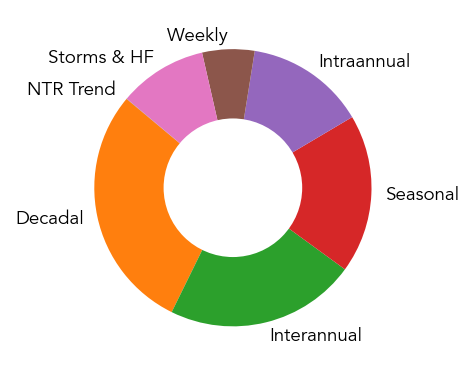

In [578]:
# let's turn our our bar chart into a pie chart
# we'll use what we used previously to get the std of each component
# ntr_cumsum_stds
# ntr_var = ntr_filtered['ntr'].var()

# ntr_component_vars['covariance'] = ntr_var - sum_ntr_var

# get the difference between each successive component
ntr_cumsum_diff = ntr_cumsum_stds.diff()
ntr_cumsum_diff['NTR Trend'] = ntr_cumsum_stds['NTR Trend']

# ntr_cumsum_diff['Interdecadal'] = ntr_cumsum_stds['Interdecadal']

#reverse the order of the components
# ntr_cumsum_stds = ntr_cumsum_stds[::-1]
# ntr_component_vars = ntr_component_vars[::-1]

# # make a pie chart, ignoring co-variance for now because omg
fig, ax = plt.subplots(figsize=(3,3))
ax.pie(ntr_cumsum_diff, labels=ntr_cumsum_diff.index, startangle=140)
center_circle = plt.Circle((0, 0), 0.5, fc='white')  # Creates a white hole
ax.add_patch(center_circle)



In [579]:
# make a locations dictionary, with stations: (lat, lon)
# from ds
stations = ds['station_name'].values
lons = ds['lon'].values
lats = ds['lat'].values
station_id = ds['record_id'].values

locations = {station: (lon,lat) for station, lat, lon in zip(stations, lats, lons)}
station_ids = {station: id for station, id in zip(stations, station_id)}

# make pie_data dictionary
ntr_component_stds_subset = ntr_component_stds.copy()
ntr_component_stds_subset = ntr_component_stds_subset.drop(['sea_level', 'tide'])
pie_data = {station: ntr_component_stds_subset for station in stations}


locations
station_ids

{'French Frigate': 14,
 'Midway': 50,
 'Johnston': 52,
 'Honolulu, Hawaii': 57,
 'Nawiliwili': 58,
 'Kahului': 59,
 'Hilo, Hawaii': 60,
 'Mokuoloe': 61,
 'Barbers Point, HI': 547,
 'Kaumalapau, HI': 548,
 'Kawaihae': 552}

In [580]:
# make a new pie data dictionary that calls from ntr_data/ntr_{station:03d}_component_stds.csv
pie_data = {}
ntr_mag = {}
for station, id in station_ids.items():
    station_path = Path(data_dir, f'ntr_data/ntr_{id:03d}_component_stds.csv')
    if not station_path.exists():
        # pie_data[station] = zeros the size of ntr_component_stds
        pie_data[station] = ntr_component_stds * 0
        continue
    station_data = pd.read_csv(station_path, index_col=0)
    if 'ntr' in station_data.index:
        ntr_mag[station] = station_data.loc['ntr'].values[0]
        station_data = station_data.drop(index='ntr')
    # print(station_data)
    # ntr_mag[station] = station_data['ntr']
    station_data = station_data.drop(index=['sea_level','tide'])
    # remove 'sea_level' and 'tide' columns
    pie_data[station] = station_data.squeeze()



Text(0.5, 1.0, 'Non-Tidal Residual Component Beachballs by Station')

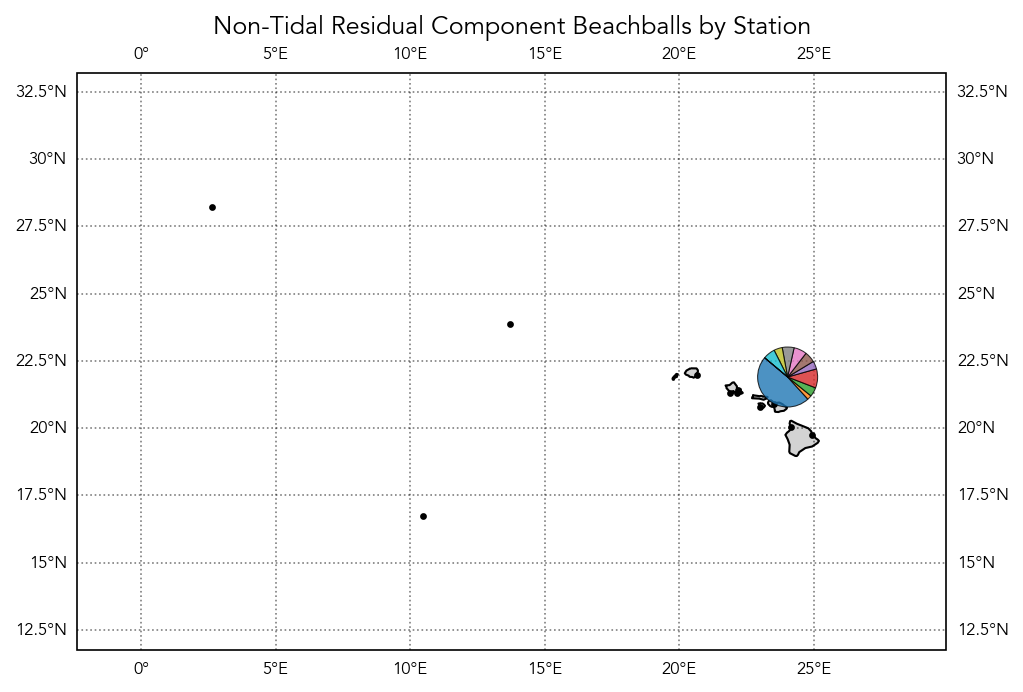

In [581]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

crs = ccrs.PlateCarree(central_longitude=180)

# Create figure and axis
fig, ax = plt.subplots(figsize=(10,5), subplot_kw={'projection': crs})
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, color='lightgrey')

# cmems = xr.open_dataset(data_dir / 'cmems_L4_SSH_0.125deg_1993_2024.nc')

xlims = [ds['lon'].min()-5, ds['lon'].max()+5]
ylims = [ds['lat'].min()-5, ds['lat'].max()+5]
xlims_360 = [x + 360 if x < 0 else x for x in xlims]

ax.set_extent([xlims_360[0], xlims_360[1], ylims[0], ylims[1]], crs=ccrs.PlateCarree())

def plot_pie_inset(data, lon, lat, station, ax, width, alpha=1):
    # Convert lat/lon to map display coordinates
    x, y = ax.projection.transform_point(lon, lat, ccrs.PlateCarree())[:2]
    y = y + 1 
    x = x + 0.5
    pie_ax = inset_axes(ax, width=width, height=width, loc=10, 
                        bbox_to_anchor=(x, y), bbox_transform=ax.transData, borderpad=0)
    pie_ax.set_facecolor('none')  # Fully transparent background

    wedges, texts, autotexts = pie_ax.pie(data, autopct='',startangle=140, 
                                          wedgeprops={'alpha': 0.8, 'edgecolor': 'black', 'linewidth': 0.5})
    
    # pie_ax.pie(data, startangle=140)  # Draw pie chart
    pie_ax.set_xticks([])
    pie_ax.set_yticks([])
    pie_ax.set_frame_on(False)  # Hide frame
    # add title
    # pie_ax.set_title(station, fontsize=8)

for station, data in pie_data.items():
    lon, lat = locations[station]
    # if data is all zeros, skip
    if np.all(data == 0):
        continue
    width = 0.5*(ntr_mag[station]/max(ntr_mag.values()))

    plot_pie_inset(data, lon, lat, station,ax, width=width)

ax.scatter(lons, lats, color='black', s=5, label='Station', transform=ccrs.PlateCarree())


#add grid
gl = ax.gridlines(draw_labels=True, linestyle=':', color='black',
                  alpha=0.5,xlocs=ax.get_xticks(),ylocs=ax.get_yticks(),crs=crs)
#make all labels tiny
gl.xlabel_style = {'size': 8}
gl.ylabel_style = {'size': 8}


# Will need to fix longitude labels!!
ax.set_title('Non-Tidal Residual Component Beachballs by Station')


In [582]:
# # make a new pie data dictionary that calls from ntr_data/ntr_{station:03d}_component_stds.csv
# pie_data = {}

# make a dataframe of the ntr_component_stds, with each station as a column
ntr_component_stds_df = pd.DataFrame(columns=stations)
# ntr_component_stds_df = ntr_component_stds_df.append(ntr_component_stds, ignore_index=True)
for station, id in station_ids.items():
    station_path = Path(data_dir, f'ntr_data/ntr_{id:03d}_component_stds.csv')
    if not station_path.exists():
#         # pie_data[station] = zeros the size of ntr_component_stds
        pie_data[station] = ntr_component_stds * 0
        continue
    station_data = pd.read_csv(station_path, index_col=0)
    ntr_component_stds_df[station] = station_data.squeeze()

#replace nans with 0
ntr_component_stds_df = ntr_component_stds_df.fillna(0).infer_objects(copy=False)
#change 'tide' to 'Tide' in index
ntr_component_stds_df = ntr_component_stds_df.rename(index={'tide':'Tide'})

/var/folders/9w/vpws17h965v7n60fmhp97k5r0000gq/T/ipykernel_42258/4155686509.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ntr_component_stds_df = ntr_component_stds_df.fillna(0).infer_objects(copy=False)


In [583]:
ntr_component_stds_df

,French Frigate,Midway,Johnston,"Honolulu, Hawaii",Nawiliwili,Kahului,"Hilo, Hawaii",Mokuoloe,"Barbers Point, HI","Kaumalapau, HI",Kawaihae
ntr,0,0,0,0,0,60.192311,0,0,0,0,0
sea_level,0,0,0,0,0,225.369458,0,0,0,0,0
sea_level_detrended,0,0,0,0,0,220.330963,0,0,0,0,0
Tide,0,0,0,0,0,209.168985,0,0,0,0,0
Nodal Amp,0,0,0,0,0,11.028892,0,0,0,0,0
Nodal Mod,0,0,0,0,0,22.774821,0,0,0,0,0
Trend,0,0,0,0,0,47.165771,0,0,0,0,0
Decadal,0,0,0,0,0,19.685445,0,0,0,0,0
Interannual,0,0,0,0,0,26.934875,0,0,0,0,0
Seasonal,0,0,0,0,0,32.216025,0,0,0,0,0


In [590]:
ds

<xarray.Dataset> Size: 55MB
Dimensions:               (time: 1052654, record_id: 11)
Coordinates:
  * time                  (time) datetime64[ns] 8MB 1905-01-01T10:00:00 ... 2...
  * record_id             (record_id) int64 88B 14 50 52 57 ... 61 547 548 552
Data variables: (12/13)
    sea_level             (record_id, time) float32 46MB ...
    lat                   (record_id) float32 44B 23.87 28.22 ... 20.78 20.03
    lon                   (record_id) float32 44B 193.7 182.6 ... 203.0 204.2
    station_name          (record_id) <U17 748B 'French Frigate' ... 'Kawaihae'
    station_country       (record_id) <U30 1kB ...
    station_country_code  (record_id) float32 44B ...
    ...                    ...
    gloss_id              (record_id) float32 44B ...
    ssc_id                (record_id) <U4 176B ...
    last_rq_date          (record_id) datetime64[ns] 88B ...
    MHHW                  (record_id) float64 88B ...
    MSL                   (record_id) float64 88B ...
    MLLW                  (record_id) float64 88B ...
Attributes:
    title:                  UHSLC Fast Delivery Tide Gauge Data (hourly)
    ncei_template_version:  NCEI_NetCDF_TimeSeries_Orthogonal_Template_v2.0
    featureType:            timeSeries
    Conventions:            CF-1.6, ACDD-1.3
    date_created:           2025-03-03T14:34:34Z
    publisher_name:         University of Hawaii Sea Level Center (UHSLC)
    publisher_email:        philiprt@hawaii.edu, markm@soest.hawaii.edu
    publisher_url:          http://uhslc.soest.hawaii.edu
    summary:                The UHSLC assembles and distributes the Fast Deli...
    processing_level:       Fast Delivery (FD) data undergo a level 1 quality...
    acknowledgment:         The UHSLC Fast Delivery database is supported by ...

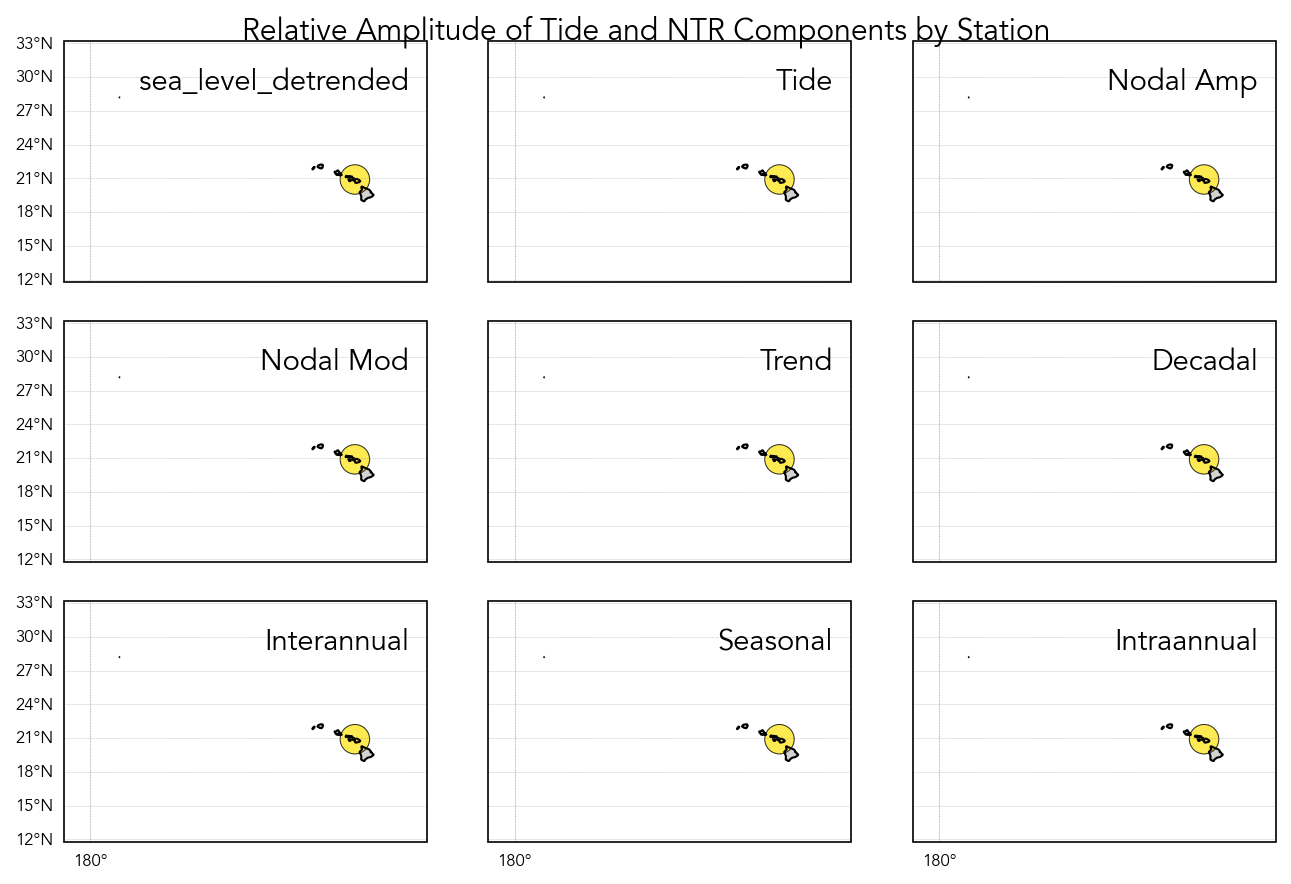

In [ ]:
#Repeat the map exercise using only the amplitudes of each component at each station, will just be a scatter plot
from maps import plot_thin_map_hawaii, get_stationinfo

fig, ax = plt.subplots(3, 3, figsize=(9, 6), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)})

ntr_component_names = ntr_component_stds_df.index
#remove sea level and ntr
ntr_component_names = ntr_component_names.drop(['sea_level','ntr'])

colors = plt.cm.tab20(np.linspace(0, 1, len(ntr_component_names)))

for i,ax in enumerate(ax.flat):
    ax,gl = plot_thin_map_hawaii(ax) ## THIN MAP HAWAII IS YOUR FIRST MISTAKE, THIS WON'T WORK FOR TONGA FRIEND

    crs = ccrs.PlateCarree(central_longitude=180)

    xlims = [ds['lon'].min()-5, ds['lon'].max()+5]
    ylims = [ds['lat'].min()-5, ds['lat'].max()+5]

    ax.set_extent([xlims[0], xlims[1], ylims[0], ylims[1]], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND, color='lightgrey')

    ntrmag = ntr_component_stds_df.loc[ntr_component_names[i]]
    ntrmagNorm = ntrmag/ntrmag.max()
    ax.scatter(lons, lats, s=200*ntrmagNorm, c = ntrmagNorm, alpha=0.8,
                transform=ccrs.PlateCarree(), linewidth=0.5, edgecolor='black')
    
    # add label for station name in upper right
    ax.text(0.95, 0.8, ntr_component_names[i], fontsize=14, ha='right', transform=ax.transAxes)
    
    #remove gl labels from interior plots
    if i % 3 != 0:
        gl.right_labels = False
        gl.left_labels = False

    if i < 6:
        gl.top_labels = False
        gl.bottom_labels = False

    if i%3 == 0:
        gl.right_labels = False
    if i>=6:
        gl.top_labels = False

plt.tight_layout()
#adjust 
# add title
fig.suptitle('Relative Amplitude of Tide and NTR Components by Station')

# suptitle should be higher
plt.subplots_adjust(top=0.95)



In [595]:
# make ntr components figure for all gauges
# Create figure
# fig, ax = plt.subplots(figsize=(6, 6))

# make empty dataframe ntr_component_stds_df
ntr_component_stds_df = pd.DataFrame(columns=ds['station_name'].values)

# get list of all ntr_component_stds in data folder, and combine them into a single dataframe
for station, id in zip(ds['station_name'].values, ds['record_id'].values):
    # read in the ntr_component_stds file
    station_path = Path(data_dir, f'ntr_data/ntr_{id:03d}_component_stds.csv')
    if not station_path.exists():
        continue
    station_data = pd.read_csv(station_path, index_col=0)
    # add to the dataframe
    ntr_component_stds_df[station] = station_data.squeeze()
# ntr_component_stds = pd.read_csv(Path(data_dir, f'ntr_data/ntr_{station:03d}_component_stds.csv'), index_col=0)


# ntr_component_vars_cumsum = ntr_component_vars.cumsum()/ntr_component_vars_sum * ntr_var #normalize to the variance of the ntr (not filtered)
# # Plot stacked bars
# bottom = 0
# for i in range(len(ntr_component_waveheight.index)-1, -1, -1):
#     ax.bar('Components', ntr_component_waveheight[i], bottom=0, label=ntr_component_waveheight.index[i].replace('\n', ' '))

# # ax.bar('Total NTR', np.std(ntr_filled), color='white', edgecolor='black', linewidth=1)

# # Labels and title
# ax.set_ylabel('Height (cm)')
# ax.set_title('Non-Tidal Residual Components by Frequency \n' + station_name)
# ax.legend(loc='lower left', bbox_to_anchor=(1, 0))
# # plt.xticks(rotation=45)
# # plt.grid(axis='y', linestyle='--', alpha=0.7)

# # no box
# for spine in ax.spines.values():
#     spine.set_visible(False)

# figName = 'NTR_components_stds' + station_name
# glue('NTR_components_stds',fig,display=False)

ntr_component_stds_df

,French Frigate,Midway,Johnston,"Honolulu, Hawaii",Nawiliwili,Kahului,"Hilo, Hawaii",Mokuoloe,"Barbers Point, HI","Kaumalapau, HI",Kawaihae
ntr,NaN,NaN,NaN,NaN,NaN,60.192311,NaN,NaN,NaN,NaN,NaN
sea_level,NaN,NaN,NaN,NaN,NaN,225.369458,NaN,NaN,NaN,NaN,NaN
sea_level_detrended,NaN,NaN,NaN,NaN,NaN,220.330963,NaN,NaN,NaN,NaN,NaN
tide,NaN,NaN,NaN,NaN,NaN,209.168985,NaN,NaN,NaN,NaN,NaN
Nodal Amp,NaN,NaN,NaN,NaN,NaN,11.028892,NaN,NaN,NaN,NaN,NaN
Nodal Mod,NaN,NaN,NaN,NaN,NaN,22.774821,NaN,NaN,NaN,NaN,NaN
Trend,NaN,NaN,NaN,NaN,NaN,47.165771,NaN,NaN,NaN,NaN,NaN
Decadal,NaN,NaN,NaN,NaN,NaN,19.685445,NaN,NaN,NaN,NaN,NaN
Interannual,NaN,NaN,NaN,NaN,NaN,26.934875,NaN,NaN,NaN,NaN,NaN
Seasonal,NaN,NaN,NaN,NaN,NaN,32.216025,NaN,NaN,NaN,NaN,NaN
